# Dataframe Wrangling and Merges for song_info

# Contents 

## 01. Import libraries and data

## 02. song_info review, wrangle, and prepare for merges 

## 03. song_streams review, wrangle, merge

## 04. bill_top_songs review, wrangle, merge

## 05. Create "Taylor's Version" variable flag

## 06. album_sales review, wrangle, merge

## 07. bill_top_alb_ts review, wrangle, merge

## 08. Create top and not top song subsets based on spotify streams

## 09. Create a alb_aggs df based on song characteristic aggregates

## 10. gsearch_st review and wrangle- album_sales and top_alb

## 11. Export dataframes

# 01. Import libraries and data

In [1]:
# Import libraries and visualization tools

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Create path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [3]:
# Import clean version of song_info dataframe

df_song_info = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'song_info_clean.csv'), index_col=0)

In [4]:
# Import clean version of song_streams dataframe

df_streams = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'song_streams_clean.csv'), index_col = 0)

In [5]:
# Import clean version of bill_top_songs dataframe

top_songs = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'bill_top_songs_ts_clean.csv'), index_col = 0)

In [6]:
# Import clean version of album_sales dataframe

alb_sales = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'alb_sales_trad_all_clean.csv'), index_col = 0)

In [7]:
# Import clean version of bill_top_albums dataframe

bill_alb = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'bill_top_alb_ts_clean.csv'), index_col = 0)

In [8]:
# Import clean version of gsearch_st

gsearch_st = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'gsearch_st_clean.csv'), index_col = 0)

In [9]:
# Set the display mode for large numbers, which will allow for a better understanding of the data

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 02. Review song_info review, wrangle, and prepare for merges

As I examine the data, it is essential that I normalize the time from song/album release in order to compare measures such as album sales and song streams. After reviewing the cleaned dataframe, I will add in these values.

In [10]:
# Check import

df_song_info.head()

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,0.033,116.998,0.685,80,212600,1,1989TV,1989TV01
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,0.067,96.057,0.701,80,231833,2,1989TV,1989TV02
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,0.040,94.868,0.305,81,231000,3,1989TV,1989TV03
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,0.045,92.021,0.206,80,235800,4,1989TV,1989TV04
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,0.032,96.997,0.520,79,193289,5,1989TV,1989TV05


In [11]:
df_song_info.columns

Index(['song_title', 'album_title', 'album_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id'],
      dtype='object')

In [12]:
df_song_info.shape

(285, 18)

In [13]:
df_song_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 529
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_title          285 non-null    object 
 1   album_title         285 non-null    object 
 2   album_release_date  285 non-null    object 
 3   track_number        285 non-null    int64  
 4   acousticness        285 non-null    float64
 5   danceability        285 non-null    float64
 6   energy              285 non-null    float64
 7   instrumentalness    285 non-null    float64
 8   liveness            285 non-null    float64
 9   loudness            285 non-null    float64
 10  speechiness         285 non-null    float64
 11  tempo               285 non-null    float64
 12  valence             285 non-null    float64
 13  song_popularity     285 non-null    int64  
 14  duration_ms         285 non-null    int64  
 15  track_number_str    285 non-null    int64  
 16  album_id     

In [14]:
df_song_info['album_title'].value_counts(dropna=False)

album_title
Red (Taylor's Version)              30
Fearless (Taylor's Version)         26
Midnights (The Til Dawn Edition)    23
1989 (Taylor's Version) [Deluxe]    22
Speak Now (Taylor's Version)        22
Red (Deluxe Edition)                22
Speak Now (Deluxe Edition)          20
1989 (Deluxe Edition)               19
Fearless Platinum Edition           19
Lover                               18
evermore (deluxe version)           17
folklore (deluxe version)           17
reputation                          15
Debut                               15
Name: count, dtype: int64

Note: need to update name of albums to match with song streams, especially [Deluxe]

## Normalize time unit

In [15]:
midnights_check = df_song_info.loc[df_song_info['album_title'] == "Midnights (The Til Dawn Edition)"]

In [16]:
midnights_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
65,Lavender Haze,Midnights (The Til Dawn Edition),5/26/2023,1,0.236,0.735,0.454,0.001,0.133,-10.516,0.088,97.043,0.075,70,202395,1,MIDN,MIDN01
66,Maroon,Midnights (The Til Dawn Edition),5/26/2023,2,0.061,0.650,0.397,0.000,0.089,-8.237,0.036,108.055,0.038,70,218270,2,MIDN,MIDN02
67,Anti-Hero,Midnights (The Til Dawn Edition),5/26/2023,3,0.115,0.637,0.649,0.000,0.147,-6.590,0.058,96.935,0.497,70,200690,3,MIDN,MIDN03
68,Snow On The Beach (feat. Lana Del Rey),Midnights (The Til Dawn Edition),5/26/2023,4,0.705,0.653,0.331,0.001,0.116,-13.534,0.039,110.014,0.166,68,256124,4,MIDN,MIDN04
69,"You're On Your Own, Kid",Midnights (The Til Dawn Edition),5/26/2023,5,0.423,0.694,0.386,0.000,0.126,-10.312,0.060,120.044,0.390,70,194206,5,MIDN,MIDN05
70,Midnight Rain,Midnights (The Til Dawn Edition),5/26/2023,6,0.705,0.654,0.372,0.000,0.114,-11.704,0.067,140.150,0.198,70,174782,6,MIDN,MIDN06
71,Question...?,Midnights (The Til Dawn Edition),5/26/2023,7,0.205,0.741,0.509,0.000,0.262,-8.747,0.190,108.978,0.113,68,210556,7,MIDN,MIDN07
72,Vigilante Shit,Midnights (The Til Dawn Edition),5/26/2023,8,0.157,0.867,0.272,0.000,0.118,-11.014,0.363,79.962,0.157,69,164801,8,MIDN,MIDN08
73,Bejeweled,Midnights (The Til Dawn Edition),5/26/2023,9,0.065,0.695,0.546,0.000,0.088,-9.184,0.066,164.000,0.425,69,194165,9,MIDN,MIDN09
74,Labyrinth,Midnights (The Til Dawn Edition),5/26/2023,10,0.804,0.493,0.308,0.328,0.123,-15.489,0.044,109.993,0.130,67,247962,10,MIDN,MIDN10


In [17]:
folklore_check = df_song_info.loc[df_song_info['album_title'] == "folklore (deluxe version)"]

In [18]:
folklore_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
243,the 1,folklore (deluxe version),8/18/2020,1,0.750,0.780,0.361,0.000,0.108,-6.942,0.048,139.902,0.163,75,210240,1,FOLK,FOLK01
244,cardigan,folklore (deluxe version),8/18/2020,2,0.525,0.612,0.580,0.000,0.260,-8.572,0.042,130.045,0.534,76,239560,2,FOLK,FOLK02
245,the last great american dynasty,folklore (deluxe version),8/18/2020,3,0.481,0.688,0.653,0.004,0.106,-8.558,0.040,147.991,0.701,74,231000,3,FOLK,FOLK03
246,exile (feat. Bon Iver),folklore (deluxe version),8/18/2020,4,0.761,0.310,0.374,0.000,0.110,-8.464,0.028,75.938,0.160,75,285640,4,FOLK,FOLK04
247,my tears ricochet,folklore (deluxe version),8/18/2020,5,0.814,0.456,0.265,0.000,0.068,-10.663,0.033,129.947,0.112,75,255893,5,FOLK,FOLK05
248,mirrorball,folklore (deluxe version),8/18/2020,6,0.686,0.549,0.417,0.000,0.060,-10.064,0.035,110.137,0.347,73,208973,6,FOLK,FOLK06
249,seven,folklore (deluxe version),8/18/2020,7,0.888,0.602,0.494,0.000,0.090,-10.813,0.028,94.955,0.374,73,208906,7,FOLK,FOLK07
250,august,folklore (deluxe version),8/18/2020,8,0.553,0.387,0.634,0.000,0.093,-9.222,0.036,89.567,0.420,75,261920,8,FOLK,FOLK08
251,this is me trying,folklore (deluxe version),8/18/2020,9,0.312,0.511,0.478,0.000,0.147,-9.837,0.032,135.882,0.408,73,195106,9,FOLK,FOLK09
252,illicit affairs,folklore (deluxe version),8/18/2020,10,0.862,0.529,0.304,0.000,0.108,-10.567,0.036,119.580,0.440,74,190893,10,FOLK,FOLK10


In [19]:
evermore_check = df_song_info.loc[df_song_info['album_title'] == "evermore (deluxe version)"]

In [20]:
evermore_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
177,willow,evermore (deluxe version),1/7/2021,1,0.833,0.392,0.574,0.002,0.145,-9.195,0.170,81.112,0.529,75,214706,1,EVER,EVER01
178,champagne problems,evermore (deluxe version),1/7/2021,2,0.920,0.462,0.240,0.000,0.113,-12.077,0.038,171.319,0.320,75,244000,2,EVER,EVER02
179,gold rush,evermore (deluxe version),1/7/2021,3,0.830,0.512,0.462,0.166,0.121,-10.491,0.041,112.050,0.353,73,185320,3,EVER,EVER03
180,‘tis the damn season,evermore (deluxe version),1/7/2021,4,0.735,0.575,0.434,0.000,0.105,-8.193,0.031,145.916,0.348,74,229840,4,EVER,EVER04
181,tolerate it,evermore (deluxe version),1/7/2021,5,0.878,0.316,0.361,0.000,0.080,-10.381,0.049,74.952,0.221,74,245440,5,EVER,EVER05
182,"no body, no crime (feat. HAIM)",evermore (deluxe version),1/7/2021,6,0.418,0.546,0.613,0.000,0.103,-7.589,0.026,79.015,0.535,73,215626,6,EVER,EVER06
183,happiness,evermore (deluxe version),1/7/2021,7,0.870,0.559,0.334,0.000,0.114,-10.733,0.038,122.079,0.211,71,315146,7,EVER,EVER07
184,dorothea,evermore (deluxe version),1/7/2021,8,0.696,0.605,0.488,0.000,0.129,-8.322,0.026,119.966,0.354,70,225880,8,EVER,EVER08
185,coney island (feat. The National),evermore (deluxe version),1/7/2021,9,0.819,0.537,0.537,0.001,0.142,-11.266,0.062,107.895,0.292,71,275320,9,EVER,EVER09
186,ivy,evermore (deluxe version),1/7/2021,10,0.855,0.515,0.545,0.000,0.092,-9.277,0.035,88.856,0.535,72,260440,10,EVER,EVER10


Key decision: Since I am using the longest track list of each album, I will update the album release date to the original album release date. However, I will update specific tracks (usually at the end of the albums) not in the original albums to specific release dates to maintain normalized and accurate future stats. For example, in the Midnights album, Snow On the Beach Featuring More Lana Del Rey and Karma feat Ice Spice were new on 5/26/2023, while all the other songs came out at the original album date.
 Currently listed:
'10/27/2023': 13 days "1989(Taylor's Version)", 1989TV
'7/7/2023' : 125 days "Speak Now (Taylor's Version)", SPEAKTV
'5/26/2023' : Need to shift -Midnights Til Dawn Edition
'11/12/2021' : 727 days "Red(Taylor's Version)", REDTV
'4/9/2021' : 944 days "Fearless(Taylor's Version)", FEARTV
'1/7/2021' : 1036 days Need to shift- evermore (deluxe version)	
'8/18/2020' : 1178 days Need to shift - folklore (deluxe edition)
'8/23/2019' : 1539 days "Lover", LOVE
'11/10/2017' : 2190 days "reputation," REP
'10/27/2014' : 3300 days "1989", 1989
'10/22/2012' : 4035 days "Red", RED
'10/25/2010' : 4763 days "Speak Now", SPEAK --all accurate
'11/11/2008' : 5476 days "Fearless", FEAR -- all accurate
'10/24/2006' : 6225 days "Debut", DEBUT -- all accurate
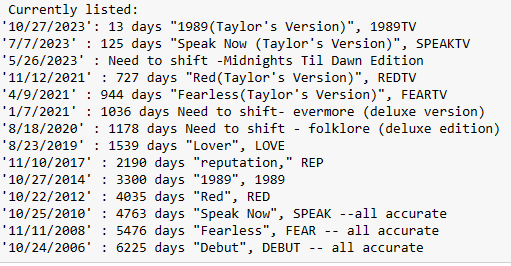

Accurate Updates 

Number of weeks since each album date as of November 9th, 2023

KEEP SAME:
'10/27/2023': 13 days "1989(Taylor's Version)", 1989TV
'7/7/2023' : 125 days "Speak Now (Taylor's Version)", SPEAKTV
'11/12/2021' : 727 days "Red(Taylor's Version)", REDTV
'8/23/2019' : 1539 days "Lover", LOVE
'11/10/2017' : 2190 days "reputation," REP
'10/27/2014' : 3300 days "1989", 1989
'10/22/2012' : 4035 days "Red", RED
'10/25/2010' : 4763 days "Speak Now", SPEAK
'11/11/2008' : 5476 days "Fearless", FEAR
'10/24/2006' : 6225 days "Debut", DEBUT


-CHANGE ALL MIDN to '10/21/2022' :  384 days "Midnights", MIDN
except for: "Snow On The Beach (feat. More Lana Del Rey)", "Karma (feat. Ice Spice)" on 5/26/2023 167 days

-CHANGE ALL EVER to '12/11/2020' : 1063 days
except for: 'right where you left me - bonus track', 'it's time to go - bonus track'  on 1/7/2021 1036 days

-CHANGE ALL FOLK to '07/24//2020' : 1203 days
except for: "the lakes - bonus track" on 08/18/2020 1178 days 

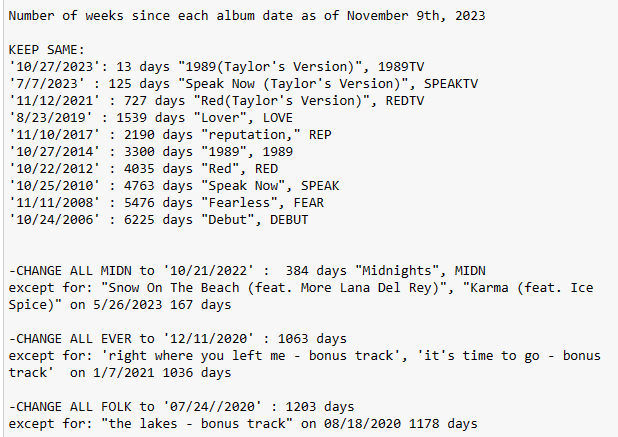

In [21]:
# Change all of MIDN from 05/26/2023 to 10/21/2022

df_song_info.loc[df_song_info['album_release_date'] == "5/26/2023", 'album_release_date'] = "10/21/2022"

In [22]:
midnights_check = df_song_info.loc[df_song_info['album_title'] == "Midnights (The Til Dawn Edition)"]

In [23]:
midnights_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
65,Lavender Haze,Midnights (The Til Dawn Edition),10/21/2022,1,0.236,0.735,0.454,0.001,0.133,-10.516,0.088,97.043,0.075,70,202395,1,MIDN,MIDN01
66,Maroon,Midnights (The Til Dawn Edition),10/21/2022,2,0.061,0.650,0.397,0.000,0.089,-8.237,0.036,108.055,0.038,70,218270,2,MIDN,MIDN02
67,Anti-Hero,Midnights (The Til Dawn Edition),10/21/2022,3,0.115,0.637,0.649,0.000,0.147,-6.590,0.058,96.935,0.497,70,200690,3,MIDN,MIDN03
68,Snow On The Beach (feat. Lana Del Rey),Midnights (The Til Dawn Edition),10/21/2022,4,0.705,0.653,0.331,0.001,0.116,-13.534,0.039,110.014,0.166,68,256124,4,MIDN,MIDN04
69,"You're On Your Own, Kid",Midnights (The Til Dawn Edition),10/21/2022,5,0.423,0.694,0.386,0.000,0.126,-10.312,0.060,120.044,0.390,70,194206,5,MIDN,MIDN05
70,Midnight Rain,Midnights (The Til Dawn Edition),10/21/2022,6,0.705,0.654,0.372,0.000,0.114,-11.704,0.067,140.150,0.198,70,174782,6,MIDN,MIDN06
71,Question...?,Midnights (The Til Dawn Edition),10/21/2022,7,0.205,0.741,0.509,0.000,0.262,-8.747,0.190,108.978,0.113,68,210556,7,MIDN,MIDN07
72,Vigilante Shit,Midnights (The Til Dawn Edition),10/21/2022,8,0.157,0.867,0.272,0.000,0.118,-11.014,0.363,79.962,0.157,69,164801,8,MIDN,MIDN08
73,Bejeweled,Midnights (The Til Dawn Edition),10/21/2022,9,0.065,0.695,0.546,0.000,0.088,-9.184,0.066,164.000,0.425,69,194165,9,MIDN,MIDN09
74,Labyrinth,Midnights (The Til Dawn Edition),10/21/2022,10,0.804,0.493,0.308,0.328,0.123,-15.489,0.044,109.993,0.130,67,247962,10,MIDN,MIDN10


In [24]:
#Update specific two bonus tracks for album_release_date for "Snow On The Beach (feat. More Lana Del Rey)", "Karma (feat. Ice Spice)" on 5/26/2023 167 days

MIDN_values_to_replace = ['MIDN22', 'MIDN23']

In [25]:
df_song_info.loc[df_song_info['song_id'].isin(MIDN_values_to_replace), 'album_release_date'] = "5/26/2023"

In [26]:
midnights_check = df_song_info.loc[df_song_info['album_title'] == "Midnights (The Til Dawn Edition)"]

In [27]:
midnights_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
65,Lavender Haze,Midnights (The Til Dawn Edition),10/21/2022,1,0.236,0.735,0.454,0.001,0.133,-10.516,0.088,97.043,0.075,70,202395,1,MIDN,MIDN01
66,Maroon,Midnights (The Til Dawn Edition),10/21/2022,2,0.061,0.650,0.397,0.000,0.089,-8.237,0.036,108.055,0.038,70,218270,2,MIDN,MIDN02
67,Anti-Hero,Midnights (The Til Dawn Edition),10/21/2022,3,0.115,0.637,0.649,0.000,0.147,-6.590,0.058,96.935,0.497,70,200690,3,MIDN,MIDN03
68,Snow On The Beach (feat. Lana Del Rey),Midnights (The Til Dawn Edition),10/21/2022,4,0.705,0.653,0.331,0.001,0.116,-13.534,0.039,110.014,0.166,68,256124,4,MIDN,MIDN04
69,"You're On Your Own, Kid",Midnights (The Til Dawn Edition),10/21/2022,5,0.423,0.694,0.386,0.000,0.126,-10.312,0.060,120.044,0.390,70,194206,5,MIDN,MIDN05
70,Midnight Rain,Midnights (The Til Dawn Edition),10/21/2022,6,0.705,0.654,0.372,0.000,0.114,-11.704,0.067,140.150,0.198,70,174782,6,MIDN,MIDN06
71,Question...?,Midnights (The Til Dawn Edition),10/21/2022,7,0.205,0.741,0.509,0.000,0.262,-8.747,0.190,108.978,0.113,68,210556,7,MIDN,MIDN07
72,Vigilante Shit,Midnights (The Til Dawn Edition),10/21/2022,8,0.157,0.867,0.272,0.000,0.118,-11.014,0.363,79.962,0.157,69,164801,8,MIDN,MIDN08
73,Bejeweled,Midnights (The Til Dawn Edition),10/21/2022,9,0.065,0.695,0.546,0.000,0.088,-9.184,0.066,164.000,0.425,69,194165,9,MIDN,MIDN09
74,Labyrinth,Midnights (The Til Dawn Edition),10/21/2022,10,0.804,0.493,0.308,0.328,0.123,-15.489,0.044,109.993,0.130,67,247962,10,MIDN,MIDN10


Succesful album release date update for midnights songs and bonus tracks.

In [28]:
# Change all of EVER from 1/7/2021 to 12/11/2020

df_song_info.loc[df_song_info['album_release_date'] == "1/7/2021", 'album_release_date'] = "12/11/2020"

In [29]:
evermore_check = df_song_info.loc[df_song_info['album_title'] == "evermore (deluxe version)"]

In [30]:
evermore_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
177,willow,evermore (deluxe version),12/11/2020,1,0.833,0.392,0.574,0.002,0.145,-9.195,0.170,81.112,0.529,75,214706,1,EVER,EVER01
178,champagne problems,evermore (deluxe version),12/11/2020,2,0.920,0.462,0.240,0.000,0.113,-12.077,0.038,171.319,0.320,75,244000,2,EVER,EVER02
179,gold rush,evermore (deluxe version),12/11/2020,3,0.830,0.512,0.462,0.166,0.121,-10.491,0.041,112.050,0.353,73,185320,3,EVER,EVER03
180,‘tis the damn season,evermore (deluxe version),12/11/2020,4,0.735,0.575,0.434,0.000,0.105,-8.193,0.031,145.916,0.348,74,229840,4,EVER,EVER04
181,tolerate it,evermore (deluxe version),12/11/2020,5,0.878,0.316,0.361,0.000,0.080,-10.381,0.049,74.952,0.221,74,245440,5,EVER,EVER05
182,"no body, no crime (feat. HAIM)",evermore (deluxe version),12/11/2020,6,0.418,0.546,0.613,0.000,0.103,-7.589,0.026,79.015,0.535,73,215626,6,EVER,EVER06
183,happiness,evermore (deluxe version),12/11/2020,7,0.870,0.559,0.334,0.000,0.114,-10.733,0.038,122.079,0.211,71,315146,7,EVER,EVER07
184,dorothea,evermore (deluxe version),12/11/2020,8,0.696,0.605,0.488,0.000,0.129,-8.322,0.026,119.966,0.354,70,225880,8,EVER,EVER08
185,coney island (feat. The National),evermore (deluxe version),12/11/2020,9,0.819,0.537,0.537,0.001,0.142,-11.266,0.062,107.895,0.292,71,275320,9,EVER,EVER09
186,ivy,evermore (deluxe version),12/11/2020,10,0.855,0.515,0.545,0.000,0.092,-9.277,0.035,88.856,0.535,72,260440,10,EVER,EVER10


In [31]:
 #Update specific two bonus tracks for album_release_date 'right where you left me - bonus track', 'it's time to go - bonus track' on 1/7/2021

EVER_values_to_replace = ['EVER16', 'EVER17']


In [32]:
df_song_info.loc[df_song_info['song_id'].isin(EVER_values_to_replace), 'album_release_date'] = "1/7/2021"

In [33]:
evermore_check = df_song_info.loc[df_song_info['album_title'] == "evermore (deluxe version)"]

In [34]:
evermore_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
177,willow,evermore (deluxe version),12/11/2020,1,0.833,0.392,0.574,0.002,0.145,-9.195,0.170,81.112,0.529,75,214706,1,EVER,EVER01
178,champagne problems,evermore (deluxe version),12/11/2020,2,0.920,0.462,0.240,0.000,0.113,-12.077,0.038,171.319,0.320,75,244000,2,EVER,EVER02
179,gold rush,evermore (deluxe version),12/11/2020,3,0.830,0.512,0.462,0.166,0.121,-10.491,0.041,112.050,0.353,73,185320,3,EVER,EVER03
180,‘tis the damn season,evermore (deluxe version),12/11/2020,4,0.735,0.575,0.434,0.000,0.105,-8.193,0.031,145.916,0.348,74,229840,4,EVER,EVER04
181,tolerate it,evermore (deluxe version),12/11/2020,5,0.878,0.316,0.361,0.000,0.080,-10.381,0.049,74.952,0.221,74,245440,5,EVER,EVER05
182,"no body, no crime (feat. HAIM)",evermore (deluxe version),12/11/2020,6,0.418,0.546,0.613,0.000,0.103,-7.589,0.026,79.015,0.535,73,215626,6,EVER,EVER06
183,happiness,evermore (deluxe version),12/11/2020,7,0.870,0.559,0.334,0.000,0.114,-10.733,0.038,122.079,0.211,71,315146,7,EVER,EVER07
184,dorothea,evermore (deluxe version),12/11/2020,8,0.696,0.605,0.488,0.000,0.129,-8.322,0.026,119.966,0.354,70,225880,8,EVER,EVER08
185,coney island (feat. The National),evermore (deluxe version),12/11/2020,9,0.819,0.537,0.537,0.001,0.142,-11.266,0.062,107.895,0.292,71,275320,9,EVER,EVER09
186,ivy,evermore (deluxe version),12/11/2020,10,0.855,0.515,0.545,0.000,0.092,-9.277,0.035,88.856,0.535,72,260440,10,EVER,EVER10


Successfully updated evermore's release dates

CHANGE ALL FOLK to '07/24//2020' : 1203 days except for: "the lakes - bonus track" on 08/18/2020 1178 days

In [35]:
# Change all of FOLK from 8/18/2020 to 07/24/2020

df_song_info.loc[df_song_info['album_release_date'] == "8/18/2020", 'album_release_date'] = "07/24/2020"

In [36]:
folklore_check = df_song_info.loc[df_song_info['album_title'] == "folklore (deluxe version)"]

In [37]:
folklore_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
243,the 1,folklore (deluxe version),07/24/2020,1,0.750,0.780,0.361,0.000,0.108,-6.942,0.048,139.902,0.163,75,210240,1,FOLK,FOLK01
244,cardigan,folklore (deluxe version),07/24/2020,2,0.525,0.612,0.580,0.000,0.260,-8.572,0.042,130.045,0.534,76,239560,2,FOLK,FOLK02
245,the last great american dynasty,folklore (deluxe version),07/24/2020,3,0.481,0.688,0.653,0.004,0.106,-8.558,0.040,147.991,0.701,74,231000,3,FOLK,FOLK03
246,exile (feat. Bon Iver),folklore (deluxe version),07/24/2020,4,0.761,0.310,0.374,0.000,0.110,-8.464,0.028,75.938,0.160,75,285640,4,FOLK,FOLK04
247,my tears ricochet,folklore (deluxe version),07/24/2020,5,0.814,0.456,0.265,0.000,0.068,-10.663,0.033,129.947,0.112,75,255893,5,FOLK,FOLK05
248,mirrorball,folklore (deluxe version),07/24/2020,6,0.686,0.549,0.417,0.000,0.060,-10.064,0.035,110.137,0.347,73,208973,6,FOLK,FOLK06
249,seven,folklore (deluxe version),07/24/2020,7,0.888,0.602,0.494,0.000,0.090,-10.813,0.028,94.955,0.374,73,208906,7,FOLK,FOLK07
250,august,folklore (deluxe version),07/24/2020,8,0.553,0.387,0.634,0.000,0.093,-9.222,0.036,89.567,0.420,75,261920,8,FOLK,FOLK08
251,this is me trying,folklore (deluxe version),07/24/2020,9,0.312,0.511,0.478,0.000,0.147,-9.837,0.032,135.882,0.408,73,195106,9,FOLK,FOLK09
252,illicit affairs,folklore (deluxe version),07/24/2020,10,0.862,0.529,0.304,0.000,0.108,-10.567,0.036,119.580,0.440,74,190893,10,FOLK,FOLK10


In [38]:
 #Update specific two bonus tracks for album_release_date '"the lakes - bonus track" on 8/18/2020

df_song_info.loc[df_song_info['song_id'] == "FOLK17", 'album_release_date'] = "8/18/2020"

In [39]:
folklore_check = df_song_info.loc[df_song_info['album_title'] == "folklore (deluxe version)"]

In [40]:
folklore_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id
243,the 1,folklore (deluxe version),07/24/2020,1,0.750,0.780,0.361,0.000,0.108,-6.942,0.048,139.902,0.163,75,210240,1,FOLK,FOLK01
244,cardigan,folklore (deluxe version),07/24/2020,2,0.525,0.612,0.580,0.000,0.260,-8.572,0.042,130.045,0.534,76,239560,2,FOLK,FOLK02
245,the last great american dynasty,folklore (deluxe version),07/24/2020,3,0.481,0.688,0.653,0.004,0.106,-8.558,0.040,147.991,0.701,74,231000,3,FOLK,FOLK03
246,exile (feat. Bon Iver),folklore (deluxe version),07/24/2020,4,0.761,0.310,0.374,0.000,0.110,-8.464,0.028,75.938,0.160,75,285640,4,FOLK,FOLK04
247,my tears ricochet,folklore (deluxe version),07/24/2020,5,0.814,0.456,0.265,0.000,0.068,-10.663,0.033,129.947,0.112,75,255893,5,FOLK,FOLK05
248,mirrorball,folklore (deluxe version),07/24/2020,6,0.686,0.549,0.417,0.000,0.060,-10.064,0.035,110.137,0.347,73,208973,6,FOLK,FOLK06
249,seven,folklore (deluxe version),07/24/2020,7,0.888,0.602,0.494,0.000,0.090,-10.813,0.028,94.955,0.374,73,208906,7,FOLK,FOLK07
250,august,folklore (deluxe version),07/24/2020,8,0.553,0.387,0.634,0.000,0.093,-9.222,0.036,89.567,0.420,75,261920,8,FOLK,FOLK08
251,this is me trying,folklore (deluxe version),07/24/2020,9,0.312,0.511,0.478,0.000,0.147,-9.837,0.032,135.882,0.408,73,195106,9,FOLK,FOLK09
252,illicit affairs,folklore (deluxe version),07/24/2020,10,0.862,0.529,0.304,0.000,0.108,-10.567,0.036,119.580,0.440,74,190893,10,FOLK,FOLK10


All bonus tracks successfully updated. Will run value counts for release dates to see if match, then create new variable for number of days since album_release

In [41]:
df_song_info['album_release_date'].value_counts(dropna=False)

album_release_date
11/12/2021    30
4/9/2021      26
10/27/2023    22
10/22/2012    22
7/7/2023      22
10/21/2022    21
10/25/2010    20
11/11/2008    19
10/27/2014    19
8/23/2019     18
07/24/2020    16
11/10/2017    15
12/11/2020    15
10/24/2006    15
1/7/2021       2
5/26/2023      2
8/18/2020      1
Name: count, dtype: int64

In [42]:
unique_release_dates = df_song_info['album_release_date'].unique()

In [43]:
unique_release_dates

array(['10/27/2023', '7/7/2023', '10/21/2022', '5/26/2023', '11/12/2021',
       '4/9/2021', '12/11/2020', '1/7/2021', '07/24/2020', '8/18/2020',
       '8/23/2019', '11/10/2017', '10/27/2014', '10/22/2012',
       '10/25/2010', '11/11/2008', '10/24/2006'], dtype=object)

## Create a new variable for number of days since album_release

In [44]:
# Create new column for days_since_release using album_release_date

result = []
for value in df_song_info['album_release_date']:
    if value == "10/27/2023":
        result.append("13")
    elif value == "7/7/2023":
        result.append("125")
    elif value == "5/26/2023":
        result.append("187")
    elif value == "10/21/2022":
        result.append("384")
    elif value == "11/12/2021":
        result.append("727")        
    elif value == "4/9/2021":
        result.append("944")
    elif value == "12/11/2020":
        result.append("1063")
    elif value == "1/7/2021":
        result.append("1036")
    elif value == "07/24/2020":
        result.append("1203")
    elif value == "8/18/2020":
         result.append("1178")
    elif value == "8/23/2019":
        result.append("1539")
    elif value == "11/10/2017":
        result.append("2190")
    elif value == "10/27/2014":
        result.append("3300")
    elif value == "10/22/2012":
        result.append("4035")
    elif value == "10/25/2010":
        result.append("4736")
    elif value == "11/11/2008":
        result.append("5476")
    elif value == "10/24/2006":
        result.append("6225")
    else:
        result.append("Unknown")

In [45]:
df_song_info['days_since_release'] = result

In [46]:
# Check new column and column values

df_song_info.columns

Index(['song_title', 'album_title', 'album_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release'],
      dtype='object')

In [47]:
df_song_info['days_since_release'].value_counts(dropna=False)

days_since_release
727     30
944     26
13      22
4035    22
125     22
384     21
4736    20
5476    19
3300    19
1539    18
1203    16
2190    15
1063    15
6225    15
1036     2
187      2
1178     1
Name: count, dtype: int64

In [48]:
folklore_check = df_song_info.loc[df_song_info['album_title'] == "folklore (deluxe version)"]

In [49]:
folklore_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id,days_since_release
243,the 1,folklore (deluxe version),07/24/2020,1,0.750,0.780,0.361,0.000,0.108,-6.942,0.048,139.902,0.163,75,210240,1,FOLK,FOLK01,1203
244,cardigan,folklore (deluxe version),07/24/2020,2,0.525,0.612,0.580,0.000,0.260,-8.572,0.042,130.045,0.534,76,239560,2,FOLK,FOLK02,1203
245,the last great american dynasty,folklore (deluxe version),07/24/2020,3,0.481,0.688,0.653,0.004,0.106,-8.558,0.040,147.991,0.701,74,231000,3,FOLK,FOLK03,1203
246,exile (feat. Bon Iver),folklore (deluxe version),07/24/2020,4,0.761,0.310,0.374,0.000,0.110,-8.464,0.028,75.938,0.160,75,285640,4,FOLK,FOLK04,1203
247,my tears ricochet,folklore (deluxe version),07/24/2020,5,0.814,0.456,0.265,0.000,0.068,-10.663,0.033,129.947,0.112,75,255893,5,FOLK,FOLK05,1203
248,mirrorball,folklore (deluxe version),07/24/2020,6,0.686,0.549,0.417,0.000,0.060,-10.064,0.035,110.137,0.347,73,208973,6,FOLK,FOLK06,1203
249,seven,folklore (deluxe version),07/24/2020,7,0.888,0.602,0.494,0.000,0.090,-10.813,0.028,94.955,0.374,73,208906,7,FOLK,FOLK07,1203
250,august,folklore (deluxe version),07/24/2020,8,0.553,0.387,0.634,0.000,0.093,-9.222,0.036,89.567,0.420,75,261920,8,FOLK,FOLK08,1203
251,this is me trying,folklore (deluxe version),07/24/2020,9,0.312,0.511,0.478,0.000,0.147,-9.837,0.032,135.882,0.408,73,195106,9,FOLK,FOLK09,1203
252,illicit affairs,folklore (deluxe version),07/24/2020,10,0.862,0.529,0.304,0.000,0.108,-10.567,0.036,119.580,0.440,74,190893,10,FOLK,FOLK10,1203


Exported df with accurate release dates as song_info_clean_2

In [50]:
taylors_version = df_song_info[df_song_info['song_title'].str.contains(" (Taylor's Version)", regex=False)]

In [51]:
pd.set_option('display.max_rows', None)

In [52]:
taylors_version

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_popularity,duration_ms,track_number_str,album_id,song_id,days_since_release
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,0.033,116.998,0.685,80,212600,1,1989TV,1989TV01,13
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,0.067,96.057,0.701,80,231833,2,1989TV,1989TV02,13
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,0.040,94.868,0.305,81,231000,3,1989TV,1989TV03,13
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,0.045,92.021,0.206,80,235800,4,1989TV,1989TV04,13
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,0.032,96.997,0.520,79,193289,5,1989TV,1989TV05,13
5,Shake It Off (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,6,0.012,0.636,0.808,0.000,0.359,-5.693,0.073,160.058,0.917,79,219209,6,1989TV,1989TV06,13
6,I Wish You Would (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,7,0.004,0.670,0.858,0.000,0.069,-6.528,0.044,118.009,0.539,79,207650,7,1989TV,1989TV07,13
7,Bad Blood (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,8,0.036,0.618,0.683,0.000,0.305,-6.438,0.194,169.971,0.363,78,211103,8,1989TV,1989TV08,13
8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,9,0.044,0.589,0.674,0.000,0.112,-7.480,0.066,139.985,0.514,78,220433,9,1989TV,1989TV09,13
9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version) [Deluxe],10/27/2023,10,0.002,0.758,0.691,0.000,0.094,-5.798,0.051,119.997,0.538,78,247533,10,1989TV,1989TV10,13


In [53]:
# Use to quickly reformat song_titles
taylors_version.to_clipboard()

In [54]:
# Use excel to quickly add formatting list, then replace to finalize

taylors_versions_song_albums_replace = {"1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "1989 (Taylor's Version) [Deluxe]" : "1989 (Taylor's Version)[Deluxe]", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Speak Now (Taylor's Version)" : "Speak Now (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Red (Taylor's Version)" : "Red (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)", "Fearless (Taylor's Version)" : "Fearless (Taylor's Version)"}


In [55]:
# Replace all album titles to be formatted without spaces and only with () 

df_song_info['album_title'].replace(taylors_versions_song_albums_replace, inplace=True)

In [56]:
df_song_info['album_title'].value_counts(dropna=True)

album_title
Red (Taylor's Version)              30
Fearless (Taylor's Version)         26
Midnights (The Til Dawn Edition)    23
1989 (Taylor's Version)[Deluxe]     22
Speak Now (Taylor's Version)        22
Red (Deluxe Edition)                22
Speak Now (Deluxe Edition)          20
1989 (Deluxe Edition)               19
Fearless Platinum Edition           19
Lover                               18
evermore (deluxe version)           17
folklore (deluxe version)           17
reputation                          15
Debut                               15
Name: count, dtype: int64

In [57]:
df_streams['album_title'].value_counts(dropna=False)

album_title
Red (Taylor's Version)              30
Fearless (Taylor's Version)         26
Midnights (The Til Dawn Edition)    23
Red (Deluxe Edition)                22
1989 (Taylor's Version) [Deluxe]    22
Speak Now (Taylor's Version)        22
Speak Now (Deluxe Edition)          20
1989 (Deluxe Edition)               19
Fearless Platinum Edition           19
Lover                               18
folklore (deluxe version)           17
evermore (deluxe version)           17
Debut                               15
reputation                          15
Name: count, dtype: int64

In [58]:
df_streams['album_title'].replace({"1989 (Taylor's Version) [Deluxe]": "1989 (Taylor's Version)[Deluxe]"}, inplace=True)

In [59]:
df_streams['album_title'].value_counts(dropna=False)

album_title
Red (Taylor's Version)              30
Fearless (Taylor's Version)         26
Midnights (The Til Dawn Edition)    23
Red (Deluxe Edition)                22
1989 (Taylor's Version)[Deluxe]     22
Speak Now (Taylor's Version)        22
Speak Now (Deluxe Edition)          20
1989 (Deluxe Edition)               19
Fearless Platinum Edition           19
Lover                               18
folklore (deluxe version)           17
evermore (deluxe version)           17
Debut                               15
reputation                          15
Name: count, dtype: int64

All album_titles match, now need to update (Taylor's Versions) for songs to match.

In [60]:
df_streams['song_title'].value_counts(dropna=False)

song_title
Tim McGraw                                                                              1
Hey Stephen (Taylor's Version)                                                          1
Dear John (Taylor's Version)                                                            1
Speak Now (Taylor's Version)                                                            1
Karma (feat. Ice Spice)                                                                 1
Ours                                                                                    1
Long Live (Taylor's Version)                                                            1
Babe (Taylor's Version) (From The Vault)                                                1
Back To December - Acoustic                                                             1
Breathe                                                                                 1
Nothing New (feat. Phoebe Bridgers) (Taylor's Version) (From The Vault)                 1

In [61]:
df_song_info['song_title'].value_counts(dropna=False)

song_title
Welcome To New York (Taylor's Version)                                                  1
Call It What You Want                                                                   1
All You Had To Do Was Stay                                                              1
Out Of The Woods                                                                        1
Style                                                                                   1
Blank Space                                                                             1
Welcome To New York                                                                     1
New Year's Day                                                                          1
This Is Why We Can't Have Nice Things                                                   1
I Wish You Would                                                                        1
Dress                                                                                   1

# 03. song_streams review, wrangle, merge

In [62]:
# Check import and df

df_streams.head()

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update,track_length_secs
0,DEBUT01,1,Tim McGraw,112816077,3:52,Debut,DEBUT,10/24/2006,11/9/2023,232
1,DEBUT02,2,Picture To Burn,163382463,2:53,Debut,DEBUT,10/24/2006,11/9/2023,173
2,DEBUT03,3,Teardrops On My Guitar - Radio Single Remix,191317513,3:23,Debut,DEBUT,10/24/2006,11/9/2023,203
3,DEBUT04,4,A Place in this World,34771836,3:19,Debut,DEBUT,10/24/2006,11/9/2023,199
4,DEBUT05,5,Cold As You,35979422,3:59,Debut,DEBUT,10/24/2006,11/9/2023,239


In [63]:
df_streams.columns

Index(['song_id', 'track_number', 'song_title', 'tot_spot_plays_song',
       'track_length', 'album_title', 'album_id', 'album_release_date',
       'last_update', 'track_length_secs'],
      dtype='object')

In [64]:
df_streams.head()

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update,track_length_secs
0,DEBUT01,1,Tim McGraw,112816077,3:52,Debut,DEBUT,10/24/2006,11/9/2023,232
1,DEBUT02,2,Picture To Burn,163382463,2:53,Debut,DEBUT,10/24/2006,11/9/2023,173
2,DEBUT03,3,Teardrops On My Guitar - Radio Single Remix,191317513,3:23,Debut,DEBUT,10/24/2006,11/9/2023,203
3,DEBUT04,4,A Place in this World,34771836,3:19,Debut,DEBUT,10/24/2006,11/9/2023,199
4,DEBUT05,5,Cold As You,35979422,3:59,Debut,DEBUT,10/24/2006,11/9/2023,239


In [65]:
df_streams.shape

(285, 10)

285 shape implies accurate song list, since it matches the 285 shape of the song_info df

In [66]:
# identified track repeat issue from future steps, going back here to address mislabeled track 15 on Fearless (Taylor's Version)
track_check_fearless = df_streams.loc[df_streams['album_title'] == "Fearless (Taylor's Version)"]

In [67]:
track_check_fearless

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update,track_length_secs
44,FEARTV02,2,Fifteen (Taylor's Version),813690804,4:54,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,294
85,FEARTV03,3,Love Story (Taylor's Version),553496170,3:55,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,235
100,FEARTV06,6,You Belong With Me (Taylor's Version),469205812,3:51,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,231
122,FEARTV10,10,The Way I Loved You (Taylor's Version),336472452,4:03,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,243
130,FEARTV22,22,Mr. Perfectly Fine (Taylor's Version) (From Th...,309475207,4:37,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,277
247,FEARTV01,1,Fearless (Taylor's Version),201043398,4:01,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,241
374,FEARTV21,21,You All Over Me (feat. Maren Morris) (Taylor's...,97743999,3:40,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,220
380,FEARTV11,11,Forever & Always (Taylor's Version),89756801,3:45,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,225
389,FEARTV05,5,White Horse (Taylor's Version),76708813,3:54,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,234
397,FEARTV04,4,Hey Stephen (Taylor's Version),73173172,4:14,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,254


In [68]:
# Update "Forever & Always (Piano Version)(Taylor's Version)" to be track 16 and have song_id FEARTV16

df_streams.loc[df_streams['song_title'] == "Forever & Always (Piano Version) (Taylor's Version)", 'song_id'] = "FEARTV16"

In [69]:
df_streams.loc[df_streams['song_title'] == "Forever & Always (Piano Version) (Taylor's Version)", 'track_number'] = 16

In [70]:
# Recheck info

track_check_fearless = df_streams.loc[df_streams['album_title'] == "Fearless (Taylor's Version)"]

In [71]:
track_check_fearless

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update,track_length_secs
44,FEARTV02,2,Fifteen (Taylor's Version),813690804,4:54,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,294
85,FEARTV03,3,Love Story (Taylor's Version),553496170,3:55,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,235
100,FEARTV06,6,You Belong With Me (Taylor's Version),469205812,3:51,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,231
122,FEARTV10,10,The Way I Loved You (Taylor's Version),336472452,4:03,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,243
130,FEARTV22,22,Mr. Perfectly Fine (Taylor's Version) (From Th...,309475207,4:37,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,277
247,FEARTV01,1,Fearless (Taylor's Version),201043398,4:01,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,241
374,FEARTV21,21,You All Over Me (feat. Maren Morris) (Taylor's...,97743999,3:40,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,220
380,FEARTV11,11,Forever & Always (Taylor's Version),89756801,3:45,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,225
389,FEARTV05,5,White Horse (Taylor's Version),76708813,3:54,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,234
397,FEARTV04,4,Hey Stephen (Taylor's Version),73173172,4:14,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,254


## Create subset of streams with only needed information

In [72]:
df_streams_sub = df_streams[['song_id', 'song_title', 'tot_spot_plays_song', 'track_number', 'album_title', 'album_id', 'track_length_secs', 'last_update']]

In [73]:
df_streams_sub.head()

,song_id,song_title,tot_spot_plays_song,track_number,album_title,album_id,track_length_secs,last_update
0,DEBUT01,Tim McGraw,112816077,1,Debut,DEBUT,232,11/9/2023
1,DEBUT02,Picture To Burn,163382463,2,Debut,DEBUT,173,11/9/2023
2,DEBUT03,Teardrops On My Guitar - Radio Single Remix,191317513,3,Debut,DEBUT,203,11/9/2023
3,DEBUT04,A Place in this World,34771836,4,Debut,DEBUT,199,11/9/2023
4,DEBUT05,Cold As You,35979422,5,Debut,DEBUT,239,11/9/2023


In [74]:
df_streams_sub.shape

(285, 8)

In [75]:
df_streams_sub['album_id'].value_counts(dropna=False)

album_id
REDTV      30
FEARTV     26
MIDN       23
RED        22
1989TV     22
SPEAKTV    22
SPEAK      20
1989       19
FEAR       19
LOVE       18
FOLK       17
EVER       17
DEBUT      15
REP        15
Name: count, dtype: int64

In [76]:
# Check for counts on song_info

df_song_info['album_id'].value_counts(dropna=False)

album_id
REDTV      30
FEARTV     26
MIDN       23
1989TV     22
SPEAKTV    22
RED        22
SPEAK      20
1989       19
FEAR       19
LOVE       18
EVER       17
FOLK       17
REP        15
DEBUT      15
Name: count, dtype: int64

Value counts match, next will rename any columns on song_streams prior to merge.

In [77]:
df_streams_sub.columns

Index(['song_id', 'song_title', 'tot_spot_plays_song', 'track_number',
       'album_title', 'album_id', 'track_length_secs', 'last_update'],
      dtype='object')

In [78]:
df_song_info.columns

Index(['song_title', 'album_title', 'album_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release'],
      dtype='object')

In [79]:
# Will remove track_number for clarity (no need to repeat)

df_streams_sub.drop(columns = ['track_number'], axis =1, inplace=True)

# Will remove other columns that repeat as needed after checking for successful match in info and formatting

C:\Users\leobs\AppData\Local\Temp\ipykernel_45988\1866936228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streams_sub.drop(columns = ['track_number'], axis =1, inplace=True)


In [80]:
df_streams_sub.columns

Index(['song_id', 'song_title', 'tot_spot_plays_song', 'album_title',
       'album_id', 'track_length_secs', 'last_update'],
      dtype='object')

## Merge streams dataframe with song info dataframe

In [81]:
df_streams_sub.shape

(285, 7)

In [82]:
df_song_info.shape

(285, 19)

In [83]:
# Merge streams and songs on song_id

song_stream_merge = pd.merge(df_song_info, df_streams_sub, how='left', on='song_id', indicator = True)

In [84]:
song_stream_merge.shape

(285, 26)

In [85]:
song_stream_merge.columns

Index(['song_title_x', 'album_title_x', 'album_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id_x',
       'song_id', 'days_since_release', 'song_title_y', 'tot_spot_plays_song',
       'album_title_y', 'album_id_y', 'track_length_secs', 'last_update',
       '_merge'],
      dtype='object')

In [86]:
# Check for successfull merge 

song_stream_merge['_merge'].value_counts(dropna=False)

_merge
both          285
left_only       0
right_only      0
Name: count, dtype: int64

In [87]:
song_stream_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   song_title_x         285 non-null    object  
 1   album_title_x        285 non-null    object  
 2   album_release_date   285 non-null    object  
 3   track_number         285 non-null    int64   
 4   acousticness         285 non-null    float64 
 5   danceability         285 non-null    float64 
 6   energy               285 non-null    float64 
 7   instrumentalness     285 non-null    float64 
 8   liveness             285 non-null    float64 
 9   loudness             285 non-null    float64 
 10  speechiness          285 non-null    float64 
 11  tempo                285 non-null    float64 
 12  valence              285 non-null    float64 
 13  song_popularity      285 non-null    int64   
 14  duration_ms          285 non-null    int64   
 15  track_number_str     28

In [88]:
song_stream_merge_song_title_nan = song_stream_merge[song_stream_merge['song_title_y'].isnull() == True]

In [89]:
song_stream_merge_song_title_nan

,song_title_x,album_title_x,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,album_id_x,song_id,days_since_release,song_title_y,tot_spot_plays_song,album_title_y,album_id_y,track_length_secs,last_update,_merge


In [90]:
song_stream_merge.head(50)

,song_title_x,album_title_x,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,album_id_x,song_id,days_since_release,song_title_y,tot_spot_plays_song,album_title_y,album_id_y,track_length_secs,last_update,_merge
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,1989TV,1989TV01,13,Welcome To New York (Taylor's Version),35521714,1989 (Taylor's Version)[Deluxe],1989TV,212,11/9/2023,both
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,1989TV,1989TV02,13,Blank Space (Taylor's Version),40958068,1989 (Taylor's Version)[Deluxe],1989TV,231,11/9/2023,both
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,1989TV,1989TV03,13,Style (Taylor's Version),47687102,1989 (Taylor's Version)[Deluxe],1989TV,231,11/9/2023,both
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,1989TV,1989TV04,13,Out Of The Woods (Taylor's Version),37545128,1989 (Taylor's Version)[Deluxe],1989TV,235,11/9/2023,both
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,1989TV,1989TV05,13,All You Had To Do Was Stay (Taylor's Version),31008534,1989 (Taylor's Version)[Deluxe],1989TV,193,11/9/2023,both
5,Shake It Off (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,6,0.012,0.636,0.808,0.000,0.359,-5.693,...,1989TV,1989TV06,13,Shake It Off (Taylor's Version),29684734,1989 (Taylor's Version)[Deluxe],1989TV,219,11/9/2023,both
6,I Wish You Would (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,7,0.004,0.670,0.858,0.000,0.069,-6.528,...,1989TV,1989TV07,13,I Wish You Would (Taylor's Version),27727454,1989 (Taylor's Version)[Deluxe],1989TV,207,11/9/2023,both
7,Bad Blood (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,8,0.036,0.618,0.683,0.000,0.305,-6.438,...,1989TV,1989TV08,13,Bad Blood (Taylor's Version),26353077,1989 (Taylor's Version)[Deluxe],1989TV,211,11/9/2023,both
8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,9,0.044,0.589,0.674,0.000,0.112,-7.480,...,1989TV,1989TV09,13,Wildest Dreams (Taylor's Version),543373389,1989 (Taylor's Version)[Deluxe],1989TV,220,11/9/2023,both
9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,10,0.002,0.758,0.691,0.000,0.094,-5.798,...,1989TV,1989TV10,13,How You Get The Girl (Taylor's Version),24935822,1989 (Taylor's Version)[Deluxe],1989TV,247,11/9/2023,both


In [91]:
# Convert days_since_release to int

song_stream_merge['days_since_release'] = song_stream_merge['days_since_release'].astype(int)

In [92]:
song_stream_merge.dtypes

song_title_x             object
album_title_x            object
album_release_date       object
track_number              int64
acousticness            float64
danceability            float64
energy                  float64
instrumentalness        float64
liveness                float64
loudness                float64
speechiness             float64
tempo                   float64
valence                 float64
song_popularity           int64
duration_ms               int64
track_number_str          int64
album_id_x               object
song_id                  object
days_since_release        int32
song_title_y             object
tot_spot_plays_song       int64
album_title_y            object
album_id_y               object
track_length_secs         int64
last_update              object
_merge                 category
dtype: object

In [93]:
song_stream_merge['album_title_y'].value_counts(dropna=False)

album_title_y
Red (Taylor's Version)              30
Fearless (Taylor's Version)         26
Midnights (The Til Dawn Edition)    23
1989 (Taylor's Version)[Deluxe]     22
Speak Now (Taylor's Version)        22
Red (Deluxe Edition)                22
Speak Now (Deluxe Edition)          20
1989 (Deluxe Edition)               19
Fearless Platinum Edition           19
Lover                               18
evermore (deluxe version)           17
folklore (deluxe version)           17
reputation                          15
Debut                               15
Name: count, dtype: int64

In [94]:
song_stream_merge['album_title_x'].value_counts(dropna=False)

album_title_x
Red (Taylor's Version)              30
Fearless (Taylor's Version)         26
Midnights (The Til Dawn Edition)    23
1989 (Taylor's Version)[Deluxe]     22
Speak Now (Taylor's Version)        22
Red (Deluxe Edition)                22
Speak Now (Deluxe Edition)          20
1989 (Deluxe Edition)               19
Fearless Platinum Edition           19
Lover                               18
evermore (deluxe version)           17
folklore (deluxe version)           17
reputation                          15
Debut                               15
Name: count, dtype: int64

In [95]:
song_stream_merge.columns

Index(['song_title_x', 'album_title_x', 'album_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id_x',
       'song_id', 'days_since_release', 'song_title_y', 'tot_spot_plays_song',
       'album_title_y', 'album_id_y', 'track_length_secs', 'last_update',
       '_merge'],
      dtype='object')

In [96]:
# Remove duplicate columns

song_stream_merge.drop(columns = ['song_title_y', 'album_title_y', 'album_id_y'], axis=1, inplace=True)

In [97]:
song_stream_merge.columns

Index(['song_title_x', 'album_title_x', 'album_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id_x',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_update', '_merge'],
      dtype='object')

In [98]:
#Rename columns for clarity

song_stream_merge.rename(columns = {'song_title_x': 'song_title', "album_title_x" : "album_title", "album_id_x": "album_id", "last_update": "last_stream_update"}, inplace=True)

In [99]:
song_stream_merge.columns

Index(['song_title', 'album_title', 'album_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', '_merge'],
      dtype='object')

In [100]:
song_stream_merge.shape

(285, 23)

## Create new variable to normalize streaming data- tot_spot_plays_song divided by days_since release

This will allow to compare spotify streams even though albums and songs were released at different times and therefore have had longer to accumulate songs as of the November 9th , 2023  streaming totals

In [101]:
# Divide total spotify streams by days since release

song_stream_merge['streams_normal'] = song_stream_merge['tot_spot_plays_song'] / song_stream_merge['days_since_release']

In [102]:
# Check for new column

song_stream_merge.head()

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,duration_ms,track_number_str,album_id,song_id,days_since_release,tot_spot_plays_song,track_length_secs,last_stream_update,_merge,streams_normal
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,212600,1,1989TV,1989TV01,13,35521714,212,11/9/2023,both,2732439.538
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,231833,2,1989TV,1989TV02,13,40958068,231,11/9/2023,both,3150620.615
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,231000,3,1989TV,1989TV03,13,47687102,231,11/9/2023,both,3668238.615
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,235800,4,1989TV,1989TV04,13,37545128,235,11/9/2023,both,2888086.769
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,193289,5,1989TV,1989TV05,13,31008534,193,11/9/2023,both,2385271.846


In [103]:
# Run stats

song_stream_merge['streams_normal'].describe()

count        285.000
mean      612284.877
std      2695969.576
min         1346.427
25%        42499.424
50%       146344.419
75%       389058.536
max     41797953.000
Name: streams_normal, dtype: float64

In [104]:
song_stream_merge['streams_normal'] = song_stream_merge['streams_normal'].astype(int)

In [105]:
song_stream_merge['streams_normal'].dtype

dtype('int32')

In [106]:
# Check album sums of streams normalized, to be explored later 

streams_figures = song_stream_merge.groupby('album_id')['streams_normal'].sum()

In [107]:
streams_figures

album_id
1989         2204522
1989TV     112484136
DEBUT         187127
EVER         3584268
FEAR          473068
FEARTV       4000902
FOLK         5119556
LOVE         5217324
MIDN        19032283
RED           794044
REDTV        5588619
REP          2989259
SPEAK         630440
SPEAKTV     12195506
Name: streams_normal, dtype: int32

Very helpful for analysis because gives popularity outside of time factors. 

# 04. bill_top_songs review, wrangle, merge

In [108]:
# Check import

top_songs.head()

,chart_week,current_song_position,song_title,artist,last_week,song_peak_pos,song_wks_on_chart
0,11/11/2023,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,0.000,1,1
1,11/11/2023,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,0.000,2,1
2,11/11/2023,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,0.000,3,1
4,11/11/2023,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,0.000,5,1
5,11/11/2023,6,Cruel Summer,Taylor Swift,1.000,1,26


In [109]:
top_songs.tail()

,chart_week,current_song_position,song_title,artist,last_week,song_peak_pos,song_wks_on_chart
89067,10/21/2006,68,Tim McGraw,Taylor Swift,72.000,68,5
89171,10/14/2006,72,Tim McGraw,Taylor Swift,77.000,72,4
89276,10/7/2006,77,Tim McGraw,Taylor Swift,87.000,77,3
89386,9/30/2006,87,Tim McGraw,Taylor Swift,86.000,86,2
89485,9/23/2006,86,Tim McGraw,Taylor Swift,NaN,86,1


In [110]:
top_songs.shape

(1337, 7)

In [111]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 89485
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   chart_week             1337 non-null   object 
 1   current_song_position  1337 non-null   int64  
 2   song_title             1337 non-null   object 
 3   artist                 1337 non-null   object 
 4   last_week              1165 non-null   float64
 5   song_peak_pos          1337 non-null   int64  
 6   song_wks_on_chart      1337 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


In [112]:
top_songs.describe()

,current_song_position,last_week,song_peak_pos,song_wks_on_chart
count,1337.000,1165.000,1337.000,1337.000
mean,39.981,32.902,17.657,12.462
std,26.651,24.921,21.188,11.595
min,1.000,0.000,1.000,1.000
25%,17.000,12.000,2.000,3.000
50%,37.000,29.000,9.000,9.000
75%,61.000,48.000,23.000,18.000
max,100.000,100.000,94.000,53.000


In [113]:
top_songs.columns

Index(['chart_week', 'current_song_position', 'song_title', 'artist',
       'last_week', 'song_peak_pos', 'song_wks_on_chart'],
      dtype='object')

In [114]:
top_songs['song_title'].value_counts(dropna=True)

song_title
Anti-Hero                                                      53
Shake It Off                                                   50
You Belong With Me                                             50
Love Story                                                     49
Teardrops On My Guitar                                         48
Blank Space                                                    38
Our Song                                                       36
I Knew You Were Trouble.                                       36
Delicate                                                       35
Style                                                          32
Lavender Haze                                                  29
Wildest Dreams                                                 27
Cruel Summer                                                   26
We Are Never Ever Getting Back Together                        24
Mine                                                           23

In [115]:
song_chart_aggs = top_songs.groupby('song_title').agg({'current_song_position':['mean'], 'song_peak_pos':['min'], 'song_wks_on_chart':['max']})

In [116]:
song_chart_aggs

,current_song_position,song_peak_pos,song_wks_on_chart
,mean,min,max
song_title,,,
'Tis The Damn Season,65.000,39,2
...Ready For It?,41.737,4,20
22,37.400,20,20
22 (Taylor's Version),52.000,52,1
Afterglow,75.000,75,1
All Of The Girls You Loved Before,57.667,12,6
All Too Well,80.000,80,1
All Too Well (Taylor's Version),60.200,1,15


In [117]:
# Display unique values in song_title

unique_songs = top_songs['song_title'].unique()

In [118]:
unique_songs.shape

(204,)

In [119]:
unique_songs

array(["Is It Over Now? (Taylor's Version) [From The Vault]",
       "Now That We Don't Talk (Taylor's Version) [From The Vault]",
       "Slut! (Taylor's Version) [From The Vault]",
       "Say Don't Go (Taylor's Version) [From The Vault]", 'Cruel Summer',
       "Bad Blood (Taylor's Version)", "Style (Taylor's Version)",
       "Suburban Legends (Taylor's Version) [From The Vault]",
       "Blank Space (Taylor's Version)",
       "Welcome To New York (Taylor's Version)",
       "Out Of The Woods (Taylor's Version)",
       "Wildest Dreams (Taylor's Version)",
       "All You Had To Do Was Stay (Taylor's Version)",
       "Shake It Off (Taylor's Version)",
       "New Romantics (Taylor's Version)", "Clean (Taylor's Version)",
       "I Wish You Would (Taylor's Version)",
       "I Know Places (Taylor's Version)",
       "Wonderland (Taylor's Version)",
       "How You Get The Girl (Taylor's Version)",
       "This Love (Taylor's Version)",
       "You Are In Love (Taylor's Version)", 

Songs not matching due to difference in capitalization for 
From evermore or folklore/EVER or FOLK:
       'Willow', 'Champagne Problems', "'Tis The Damn Season", 'Gold Rush',
       'Tolerate It', 'Happiness', 'Ivy', 'Dorothea', 'Long Story Short',
       'Cowboy Like Me', 'Marjorie', 'Closure', 'Cardigan', 'The 1',
       'The Last Great American Dynasty', 'My Tears Ricochet', 'August',
       'Invisible String', 'Betty', 'Mirrorball', 'Seven',
       'This Is Me Trying', 'Illicit Affairs', 'Mad Woman', 'Epiphany',
       'Peace', 'Hoax'
       
 To: 'willow', 'champagne problems', "'tis the damn season'", 'gold rush', 'tolerate it', 'happiness', 'ivy','dorthea', 'long story short', 'cowboy like me', 'marjorie', 'closure', 'cardigan', 'the 1', 'the last great american dynasty', 'my tears ricochet', 'august','invisible string', 'betty', "mirrorball", 'seven', 'this is me trying', 'illicit affairs', 'mad woman', 'epiphany', 'peace', 'hoax'}
 

No need to change (can remove or ignore) because not from studio albums: 
    'Carolina', 'Christmas Tree Farm (Old Timey Version)', 'Only The Young', 'Christmas Tree Farm', 
    'Sweeter Than Fiction', 'Eyes Open', 'Crazier'
    
Need to resolve and unsure why an issue/missing from streams: 
       From 1989 (Taylor's Version)/1989TV: 
           "Now That We Don't Talk (Taylor's Version) [From The Vault]",
              "Slut! (Taylor's Version) [From The Vault]",
           "Say Don't Go (Taylor's Version) [From The Vault]",
           "Suburban Legends (Taylor's Version) [From The Vault]",
       
       Speak Now (Taylor's Version)/SPEAKTV:"When Emma Falls In Love (Taylor's Version) (From The Vault)"
       From Lover/LOVE: 'All Of The Girls You Loved Before'
       From Fearless/FEAR: 'Today Was A Fairytale', 'Superstar'
       From Red/RED: 'Ronan' 
       From Debut/DEBUT: 'Teardrops On My Guitar'
       
       Unknown album, possible not Taylor Swift: 'Breathless'

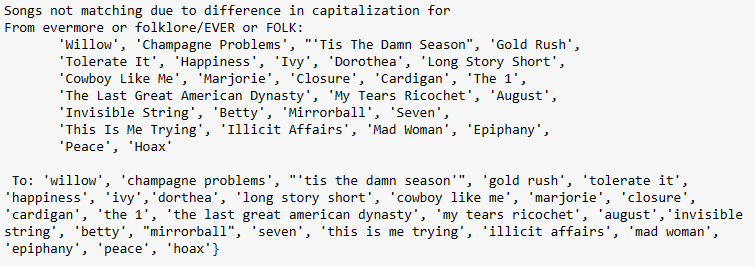
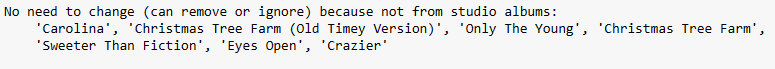
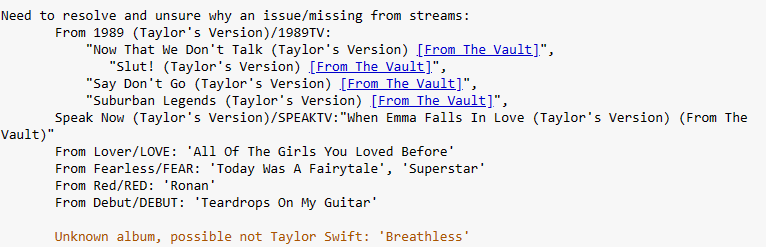

In [120]:
# Replace capital values with lowercase for evermore and folklore albums to match for merge

ever_folk_values_to_change = {'Willow': 'willow', 'Champagne Problems': 'champagne problems', "'Tis The Damn Season": "'tis the damn season'", 'Gold Rush': 'gold rush',
       'Tolerate It': 'tolerate it', 'Happiness': 'happiness', 'Ivy': 'ivy', 'Dorothea': 'dorthea', 'Long Story Short': 'long story short',
       'Cowboy Like Me': 'cowboy like me', 'Marjorie': 'marjorie', 'Closure': 'closure', 'Cardigan': 'cardigan', 'The 1': 'the 1',
       'The Last Great American Dynasty':'the last great american dynasty', 'My Tears Ricochet': 'my tears ricochet', 'August': 'august','Invisible String': 'invisible string', 'Betty': 'betty', "Mirrorball":"mirrorball", 'Seven': 'seven',
       'This Is Me Trying': 'this is me trying', 'Illicit Affairs': 'illicit affairs', 'Mad Woman': 'mad woman', 'Epiphany': 'epiphany', 'Peace': 'peace', 'Hoax': 'hoax'}


In [121]:
top_songs['song_title'].replace(ever_folk_values_to_change, inplace=True)

In [122]:
# Check for changes, both albums should have all lowercase song titles

unique_songs_update = top_songs['song_title'].unique()

In [123]:
unique_songs_update

array(["Is It Over Now? (Taylor's Version) [From The Vault]",
       "Now That We Don't Talk (Taylor's Version) [From The Vault]",
       "Slut! (Taylor's Version) [From The Vault]",
       "Say Don't Go (Taylor's Version) [From The Vault]", 'Cruel Summer',
       "Bad Blood (Taylor's Version)", "Style (Taylor's Version)",
       "Suburban Legends (Taylor's Version) [From The Vault]",
       "Blank Space (Taylor's Version)",
       "Welcome To New York (Taylor's Version)",
       "Out Of The Woods (Taylor's Version)",
       "Wildest Dreams (Taylor's Version)",
       "All You Had To Do Was Stay (Taylor's Version)",
       "Shake It Off (Taylor's Version)",
       "New Romantics (Taylor's Version)", "Clean (Taylor's Version)",
       "I Wish You Would (Taylor's Version)",
       "I Know Places (Taylor's Version)",
       "Wonderland (Taylor's Version)",
       "How You Get The Girl (Taylor's Version)",
       "This Love (Taylor's Version)",
       "You Are In Love (Taylor's Version)", 

In [124]:
unique_songs_update.shape

(204,)

Appears accurate, will no remove unneeded songs as listed
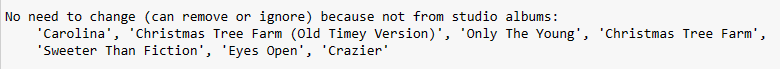

In [125]:
# List songs to drop

songs_to_drop = ['Carolina', 'Christmas Tree Farm (Old Timey Version)', 'Only The Young', 'Christmas Tree Farm', 
    'Sweeter Than Fiction', 'Eyes Open', 'Crazier']

In [126]:
# Drop from song df

top_songs = top_songs[~top_songs['song_title'].isin(songs_to_drop)]

In [127]:
# Check removal

unique_songs_update_2 = top_songs['song_title'].unique()

In [128]:
unique_songs_update_2.shape

(197,)

7 songs dropped, successful drop

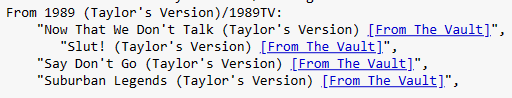
From 1989 (Taylor's Version)/1989TV: 
           "Now That We Don't Talk (Taylor's Version) [From The Vault]",
              "Slut! (Taylor's Version) [From The Vault]",
           "Say Don't Go (Taylor's Version) [From The Vault]",
           "Suburban Legends (Taylor's Version) [From The Vault]"

In [129]:
# Need to reformat the 1989TV tracks- replace [] with () for 1989 TV songs

top_songs['song_title'].replace({"Now That We Don't Talk (Taylor's Version) [From The Vault]": "Now That We Don't Talk (Taylor's Version)(From The Vault)", 
                           "Slut! (Taylor's Version) [From The Vault]": '''"Slut!"(Taylor's Version)(From The Vault)''', 
                           "Say Don't Go (Taylor's Version) [From The Vault]": "Say Don't Go (Taylor's Version)(From The Vault)", 
                           "Suburban Legends (Taylor's Version) [From The Vault]": "Suburban Legends (Taylor's Version)(From The Vault)"}, inplace=True)

In [130]:
unique_songs_update_1989tv = top_songs['song_title'].unique()

In [131]:
unique_songs_update_1989tv.shape

(197,)

In [132]:
unique_songs_update_1989tv

array(["Is It Over Now? (Taylor's Version) [From The Vault]",
       "Now That We Don't Talk (Taylor's Version)(From The Vault)",
       '"Slut!"(Taylor\'s Version)(From The Vault)',
       "Say Don't Go (Taylor's Version)(From The Vault)", 'Cruel Summer',
       "Bad Blood (Taylor's Version)", "Style (Taylor's Version)",
       "Suburban Legends (Taylor's Version)(From The Vault)",
       "Blank Space (Taylor's Version)",
       "Welcome To New York (Taylor's Version)",
       "Out Of The Woods (Taylor's Version)",
       "Wildest Dreams (Taylor's Version)",
       "All You Had To Do Was Stay (Taylor's Version)",
       "Shake It Off (Taylor's Version)",
       "New Romantics (Taylor's Version)", "Clean (Taylor's Version)",
       "I Wish You Would (Taylor's Version)",
       "I Know Places (Taylor's Version)",
       "Wonderland (Taylor's Version)",
       "How You Get The Girl (Taylor's Version)",
       "This Love (Taylor's Version)",
       "You Are In Love (Taylor's Version)", 'A

1989TV songs updated

Need to update remainder song issues to match
Speak Now (Taylor's Version)/SPEAKTV:"When Emma Falls In Love (Taylor's Version) (From The Vault)" song_id: 'SPEAK18'
       From Lover/LOVE: 'All Of The Girls You Loved Before' --> remove/not needed because not a studio album (single only)
       From Fearless/FEAR: 'Today Was A Fairytale'--> remove/not needed (single only), 'Superstar' song_id: FEAR05
       From Red/RED: 'Ronan' --> UPDATE, this is from REDTV song_id: 'REDTV21'
       From Debut/DEBUT: 'Teardrops On My Guitar' song_id: 'DEBUT03' or DEBUT15
       
       Unknown album, possible not Taylor Swift: 'Breathless'

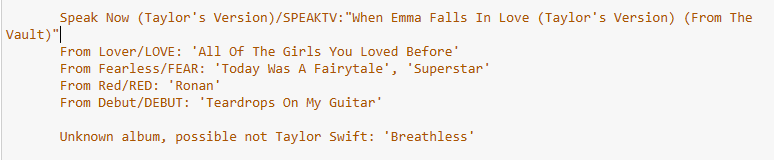

In [133]:
# Remove not needed songs from top_songs as listed above

songs_to_drop_2 = ['Today Was A Fairytale', 'All Of The Girls You Loved Before', 'Breathless']

In [134]:
# Remove not needed songs from top_songs

top_songs = top_songs[~top_songs['song_title'].isin(songs_to_drop_2)]

In [135]:
top_songs_single_remove_unique = top_songs['song_title'].unique()

In [136]:
top_songs_single_remove_unique.shape

#Should be 194 if accurate

(194,)

In [137]:
# See what issue is with final songs in naming between two dfs: 'DEBUT15', 'REDTV21', 'FEAR05', 'SPEAK18'

check_song_names = song_stream_merge.loc[song_stream_merge['song_id'].isin(['DEBUT15', 'REDTV21', 'FEAR05', 'SPEAK18'])]

In [138]:
check_song_names

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,duration_ms,track_number_str,album_id,song_id,days_since_release,tot_spot_plays_song,track_length_secs,last_stream_update,_merge,streams_normal
87,Ronan (Taylor's Version),Red (Taylor's Version),11/12/2021,21,0.661,0.623,0.279,0.000,0.193,-10.802,...,264253,21,REDTV,REDTV21,727,209301290,329,11/9/2023,both,287897
248,Back To December - Acoustic,Speak Now (Deluxe Edition),10/25/2010,18,0.748,0.541,0.453,0.000,0.200,-6.459,...,292560,18,SPEAK,SPEAK18,4736,73336731,292,11/9/2023,both,15484
255,SuperStar,Fearless Platinum Edition,11/11/2008,5,0.367,0.610,0.531,0.000,0.351,-6.123,...,261453,5,FEAR,FEAR05,5476,13160501,261,11/9/2023,both,2403
284,Teardrops on My Guitar - Pop Version,Debut,10/24/2006,15,0.040,0.459,0.753,0.000,0.086,-3.827,...,179066,15,DEBUT,DEBUT15,6225,28224285,179,11/9/2023,both,4534


In [139]:
# Compare to billboard top song song_titles

check_song_names_top_df = top_songs.loc[top_songs['song_title'].isin(["When Emma Falls In Love (Taylor's Version) (From The Vault)", 'Superstar', 'Ronan','Teardrops On My Guitar'])]

In [140]:
check_song_names_top_df

,chart_week,current_song_position,song_title,artist,last_week,song_peak_pos,song_wks_on_chart
1633,7/22/2023,34,When Emma Falls In Love (Taylor's Version) (Fr...,Taylor Swift,0.000,34,1
58035,9/29/2012,36,Ronan,Taylor Swift,16.000,16,2
58115,9/22/2012,16,Ronan,Taylor Swift,NaN,16,1
73025,11/14/2009,26,Superstar,Taylor Swift,NaN,26,1
80848,5/17/2008,49,Teardrops On My Guitar,Taylor Swift,48.000,13,48
80947,5/10/2008,48,Teardrops On My Guitar,Taylor Swift,38.000,13,47
81037,5/3/2008,38,Teardrops On My Guitar,Taylor Swift,29.000,13,46
81128,4/26/2008,29,Teardrops On My Guitar,Taylor Swift,26.000,13,45
81225,4/19/2008,26,Teardrops On My Guitar,Taylor Swift,26.000,13,44
81325,4/12/2008,26,Teardrops On My Guitar,Taylor Swift,22.000,13,43


In [141]:
check_song_names_top_df_unique = check_song_names_top_df['song_title'].unique()

In [142]:
check_song_names_top_df_unique

array(["When Emma Falls In Love (Taylor's Version) (From The Vault)",
       'Ronan', 'Superstar', 'Teardrops On My Guitar'], dtype=object)

In [143]:
# Check for accurate name for "When Emma Falls In Love (Taylor's Version) (From The Vault)"

emma_song_check = song_stream_merge[song_stream_merge['song_title'].str.contains("Emma")]

In [144]:
pd.set_option('display.max_colwidth', None)

In [145]:
emma_song_check[['song_title', 'song_id']]

,song_title,song_id
39,When Emma Falls in Love (Taylor's Version) (From The Vault),SPEAKTV18


Unsure why the song names don't allign. Appears correct and to match the top_songs df

In [146]:
pd.reset_option('display.max_colwidth')

In [147]:
# Delete 'Ronan' from top_songs, due to single release vs. studio album song

top_songs = top_songs[top_songs['song_title'] != 'Ronan']

In [148]:
# Replace to be accurate song names in top_songs df, checked by looking up accurate song names on Spotify
# Teardrops needs to add the radio remix at the end

top_songs['song_title'] = top_songs['song_title'].replace({'Teardrops On My Guitar': 'Teardrops On My Guitar- Radio Single Remix'})

In [149]:
# Check for name changes for Teardrops

teardrop_check = top_songs.loc[top_songs['song_title'] == 'Teardrops On My Guitar- Radio Single Remix']

In [150]:
teardrop_check

,chart_week,current_song_position,song_title,artist,last_week,song_peak_pos,song_wks_on_chart
80848,5/17/2008,49,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,48.000,13,48
80947,5/10/2008,48,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,38.000,13,47
81037,5/3/2008,38,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,29.000,13,46
81128,4/26/2008,29,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,26.000,13,45
81225,4/19/2008,26,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,26.000,13,44
81325,4/12/2008,26,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,22.000,13,43
81421,4/5/2008,22,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,22.000,13,42
81521,3/29/2008,22,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,20.000,13,41
81619,3/22/2008,20,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,22.000,13,40
81721,3/15/2008,22,Teardrops On My Guitar- Radio Single Remix,Taylor Swift,16.000,13,39


In [151]:
# Replace to be accurate names in song_stream_merge df

song_stream_merge['song_title'].replace('SuperStar','Superstar', inplace=True)

In [152]:
# Check for name changes for Superstar, Superstar is accurate in top_songs and needs to be changed from SuperStar to Superstar in song_stream_merge

Superstar_check = song_stream_merge.loc[song_stream_merge['song_title'] =='Superstar']

In [153]:
Superstar_check

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,duration_ms,track_number_str,album_id,song_id,days_since_release,tot_spot_plays_song,track_length_secs,last_stream_update,_merge,streams_normal
255,Superstar,Fearless Platinum Edition,11/11/2008,5,0.367,0.610,0.531,0.000,0.351,-6.123,...,261453,5,FEAR,FEAR05,5476,13160501,261,11/9/2023,both,2403


In [154]:
# Isolate unique songs for top_songs

top_songs_unique_final = top_songs['song_title'].unique()

In [155]:
# Review shape of top_songs_unique_final (should now be 193)

top_songs_unique_final.shape

(193,)

In [156]:
# Review shape of top_songs df

top_songs.shape

(1280, 7)

In [157]:
# Review shape (should still be 285, just with song_title renames)

song_stream_merge.shape

(285, 24)

In [158]:
top_songs_unique_final

array(["Is It Over Now? (Taylor's Version) [From The Vault]",
       "Now That We Don't Talk (Taylor's Version)(From The Vault)",
       '"Slut!"(Taylor\'s Version)(From The Vault)',
       "Say Don't Go (Taylor's Version)(From The Vault)", 'Cruel Summer',
       "Bad Blood (Taylor's Version)", "Style (Taylor's Version)",
       "Suburban Legends (Taylor's Version)(From The Vault)",
       "Blank Space (Taylor's Version)",
       "Welcome To New York (Taylor's Version)",
       "Out Of The Woods (Taylor's Version)",
       "Wildest Dreams (Taylor's Version)",
       "All You Had To Do Was Stay (Taylor's Version)",
       "Shake It Off (Taylor's Version)",
       "New Romantics (Taylor's Version)", "Clean (Taylor's Version)",
       "I Wish You Would (Taylor's Version)",
       "I Know Places (Taylor's Version)",
       "Wonderland (Taylor's Version)",
       "How You Get The Girl (Taylor's Version)",
       "This Love (Taylor's Version)",
       "You Are In Love (Taylor's Version)", 'A

Completed all song removals and renames to allow for a full merge of song_stream_merge df and top_songs flag. Will use list of unique songs from the top_songs df for thetop_song flag below

## Create top_song flag in song_stream_merge and merge song_stream_merge with top 100 chart data for all the top songs

First, will create a top song flag in song_stream_merge based on if each song has ever appeared in the bill_top_100.

Next, will add song_stream_merge information to a new top_songs df that will have information for each of the top songs.

In [159]:
# Check song_stream_merge shape. There are 191 songs from the Billboard Hot 100 that should allign.

song_stream_merge.shape

(285, 24)

Based on this, there should be 191 top songs and 94 not top songs after completing the for lop for top_song flag

In [160]:
# Create a for-loop to specify top song or not

top = []

for value in song_stream_merge['song_title']:
    if value in ["Is It Over Now? (Taylor's Version) [From The Vault]",
       "Now That We Don't Talk (Taylor's Version)(From The Vault)",
       '"Slut!"(Taylor\'s Version)(From The Vault)',
       "Say Don't Go (Taylor's Version)(From The Vault)", 'Cruel Summer',
       "Bad Blood (Taylor's Version)", "Style (Taylor's Version)",
       "Suburban Legends (Taylor's Version)(From The Vault)",
       "Blank Space (Taylor's Version)",
       "Welcome To New York (Taylor's Version)",
       "Out Of The Woods (Taylor's Version)",
       "Wildest Dreams (Taylor's Version)",
       "All You Had To Do Was Stay (Taylor's Version)",
       "Shake It Off (Taylor's Version)",
       "New Romantics (Taylor's Version)", "Clean (Taylor's Version)",
       "I Wish You Would (Taylor's Version)",
       "I Know Places (Taylor's Version)",
       "Wonderland (Taylor's Version)",
       "How You Get The Girl (Taylor's Version)",
       "This Love (Taylor's Version)",
       "You Are In Love (Taylor's Version)", 'Anti-Hero',
       "I Can See You (Taylor's Version) (From The Vault)", 'Blank Space',
       "Enchanted (Taylor's Version)",
       "Back To December (Taylor's Version)", "Mine (Taylor's Version)",
       "Sparks Fly (Taylor's Version)", "Dear John (Taylor's Version)",
       "Better Than Revenge (Taylor's Version)",
       "Speak Now (Taylor's Version)",
       "When Emma Falls In Love (Taylor's Version) (From The Vault)",
       "Mean (Taylor's Version)",
       "Foolish One (Taylor's Version) (From The Vault)",
       "The Story Of Us (Taylor's Version)",
       "Timeless (Taylor's Version) (From The Vault)",
       "Haunted (Taylor's Version)", "Long Live (Taylor's Version)",
       "Last Kiss (Taylor's Version)", "Never Grow Up (Taylor's Version)",
       "Innocent (Taylor's Version)", "Ours (Taylor's Version)",
       "Superman (Taylor's Version)", 'Hits Different', 'Karma',
       'Lavender Haze', 'Bejeweled', 'Midnight Rain', 'Maroon',
       "You're On Your Own, Kid", 'Vigilante Shit', 'Question...?',
       'Mastermind', 'Labyrinth', 'Sweet Nothing',
       "Would've, Could've, Should've", 'The Great War',
       'Bigger Than The Whole Sky', 'Paris', 'High Infidelity', 'Glitch',
       'Dear Reader', "All Too Well (Taylor's Version)",
       "Message In A Bottle (Taylor's Version) (From The Vault)",
       "Red (Taylor's Version)", "State Of Grace (Taylor's Version)",
       "I Knew You Were Trouble (Taylor's Version)",
       "Better Man (Taylor's Version) (From The Vault)",
       "22 (Taylor's Version)", "Treacherous (Taylor's Version)",
       "We Are Never Ever Getting Back Together (Taylor's Version)",
       "I Almost Do (Taylor's Version)",
       "The Very First Night (Taylor's Version) (From The Vault)",
       "Stay Stay Stay (Taylor's Version)",
       "Babe (Taylor's Version) (From The Vault)",
       "Holy Ground (Taylor's Version)", "Begin Again (Taylor's Version)",
       "Forever Winter (Taylor's Version) (From The Vault)",
       "The Moment I Knew (Taylor's Version)",
       "The Lucky One (Taylor's Version)",
       "Sad Beautiful Tragic (Taylor's Version)",
       "Come Back...Be Here (Taylor's Version)",
       "Starlight (Taylor's Version)", 'willow',
       "Mr. Perfectly Fine (Taylor's Version) (From The Vault)",
       "Love Story (Taylor's Version)",
       "Forever & Always (Taylor's Version)",
       "Fearless (Taylor's Version)",
       "You Belong With Me (Taylor's Version)",
       "Fifteen (Taylor's Version)",
       "The Way I Loved You (Taylor's Version)", 'champagne problems',
       "'tis the damn season'", 'gold rush', 'tolerate it', 'happiness',
       'ivy', 'dorthea', 'long story short', 'cowboy like me', 'marjorie',
       'closure', 'cardigan', 'the 1', 'the last great american dynasty',
       'my tears ricochet', 'august', 'invisible string', 'betty',
       'mirrorball', 'seven', 'this is me trying', 'illicit affairs',
       'mad woman', 'epiphany', 'peace', 'hoax', 'The Man', 'Lover',
       'You Need To Calm Down', 'I Forgot That You Existed', 'The Archer',
       'Paper Rings', 'Miss Americana & The Heartbreak Prince',
       'I Think He Knows', 'Cornelia Street', 'London Boy',
       'Death By A Thousand Cuts', 'Afterglow', 'False God', 'Daylight',
       "It's Nice To Have A Friend", 'Delicate', '...Ready For It?',
       'Look What You Made Me Do', 'Call It What You Want', 'Gorgeous',
       'New Romantics', 'Wildest Dreams', 'Out Of The Woods',
       'Shake It Off', 'Style', 'You Are In Love', 'Wonderland',
       'Welcome To New York', 'Red', '22', 'I Knew You Were Trouble.',
       'Begin Again', 'We Are Never Ever Getting Back Together',
       'The Moment I Knew', 'I Almost Do', 'All Too Well',
       'Stay Stay Stay', 'State Of Grace', 'Ours', 'Sparks Fly',
       'If This Was A Movie', 'Superman', 'Haunted', 'Mean',
       'The Story Of Us', 'Back To December', 'Mine', 'Innocent',
       'Dear John', 'Better Than Revenge', 'Last Kiss', 'Enchanted',
       'Never Grow Up', 'Long Live', 'Speak Now', 'Fearless',
       'You Belong With Me', 'Fifteen', 'Jump Then Fall', 'Untouchable',
       'The Other Side Of The Door', 'Forever & Always', 'Superstar',
       'Come In With The Rain', 'Love Story', 'White Horse',
       "You're Not Sorry", 'The Way I Loved You', 'Hey Stephen',
       "Should've Said No", 'Change', 'Picture To Burn', 'Our Song',
       'Teardrops On My Guitar- Radio Single Remix', 'Tim McGraw']:
        top.append('top song')
    else:
        top.append('not top')

In [161]:
# Merge list with dataframe as new column

song_stream_merge['top_song'] = top

In [162]:
# Check column addition and acuracy

song_stream_merge.head()

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,track_number_str,album_id,song_id,days_since_release,tot_spot_plays_song,track_length_secs,last_stream_update,_merge,streams_normal,top_song
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,1,1989TV,1989TV01,13,35521714,212,11/9/2023,both,2732439,top song
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,2,1989TV,1989TV02,13,40958068,231,11/9/2023,both,3150620,top song
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,3,1989TV,1989TV03,13,47687102,231,11/9/2023,both,3668238,top song
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,4,1989TV,1989TV04,13,37545128,235,11/9/2023,both,2888086,top song
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,5,1989TV,1989TV05,13,31008534,193,11/9/2023,both,2385271,top song


In [163]:
song_stream_merge['top_song'].value_counts(dropna=False)

top_song
top song    184
not top     101
Name: count, dtype: int64

The sum of each category equals the shape of the dataframe. However, there were 191 rows in the unique song title list for Billboard Top Songs, which means that 46 top songs were not added. Will check for formatting issues now.

In [164]:
not_top_songs = song_stream_merge.loc[song_stream_merge['top_song'] == "not top"]

In [165]:
pd.set_option('display.max_colwidth', None)

In [166]:
not_top_songs

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,track_number_str,album_id,song_id,days_since_release,tot_spot_plays_song,track_length_secs,last_stream_update,_merge,streams_normal,top_song
16,"""Slut!"" (Taylor's Version) (From The Vault)",1989 (Taylor's Version)[Deluxe],10/27/2023,17,0.309,0.591,0.412,0.000,0.061,-13.270,...,17,1989TV,1989TV17,13,57165016,180,11/9/2023,both,4397308,not top
17,Say Don't Go (Taylor's Version) (From The Vault),1989 (Taylor's Version)[Deluxe],10/27/2023,18,0.066,0.633,0.551,0.000,0.127,-8.297,...,18,1989TV,1989TV18,13,53394727,279,11/9/2023,both,4107286,not top
18,Now That We Don't Talk (Taylor's Version) (From The Vault),1989 (Taylor's Version)[Deluxe],10/27/2023,19,0.160,0.800,0.501,0.000,0.087,-9.332,...,19,1989TV,1989TV19,13,62498580,146,11/9/2023,both,4807583,not top
19,Suburban Legends (Taylor's Version) (From The Vault),1989 (Taylor's Version)[Deluxe],10/27/2023,20,0.207,0.701,0.625,0.000,0.105,-8.804,...,20,1989TV,1989TV20,13,39590451,171,11/9/2023,both,3045419,not top
20,Is It Over Now? (Taylor's Version) (From The Vault),1989 (Taylor's Version)[Deluxe],10/27/2023,21,0.041,0.595,0.656,0.000,0.122,-7.343,...,21,1989TV,1989TV21,13,75342404,229,11/9/2023,both,5795569,not top
21,Bad Blood (feat. Kendrick Lamar) (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,22,0.010,0.602,0.648,0.000,0.217,-6.905,...,22,1989TV,1989TV22,13,17075733,199,11/9/2023,both,1313517,not top
38,Electric Touch (feat. Fall Out Boy) (Taylor's Version) (From The Vault),Speak Now (Taylor's Version),7/7/2023,17,0.016,0.547,0.855,0.000,0.144,-4.700,...,17,SPEAKTV,SPEAKTV17,125,57250816,266,11/9/2023,both,458006,not top
39,When Emma Falls in Love (Taylor's Version) (From The Vault),Speak Now (Taylor's Version),7/7/2023,18,0.159,0.474,0.763,0.000,0.138,-4.632,...,18,SPEAKTV,SPEAKTV18,125,55997215,252,11/9/2023,both,447977,not top
41,Castles Crumbling (feat. Hayley Williams) (Taylor's Version) (From The Vault),Speak Now (Taylor's Version),7/7/2023,20,0.362,0.576,0.570,0.000,0.067,-7.925,...,20,SPEAKTV,SPEAKTV20,125,56551218,306,11/9/2023,both,452409,not top
47,Snow On The Beach (feat. Lana Del Rey),Midnights (The Til Dawn Edition),10/21/2022,4,0.705,0.653,0.331,0.001,0.116,-13.534,...,4,MIDN,MIDN04,384,369571439,256,11/9/2023,both,962425,not top


In [167]:
# Create subset df with just song names 

song_merge_list = song_stream_merge[['song_title']]

In [168]:
song_merge_list

,song_title
0,Welcome To New York (Taylor's Version)
1,Blank Space (Taylor's Version)
2,Style (Taylor's Version)
3,Out Of The Woods (Taylor's Version)
4,All You Had To Do Was Stay (Taylor's Version)
5,Shake It Off (Taylor's Version)
6,I Wish You Would (Taylor's Version)
7,Bad Blood (Taylor's Version)
8,Wildest Dreams (Taylor's Version)
9,How You Get The Girl (Taylor's Version)


In [169]:
top_song_list = top_songs[['song_title']]

In [170]:
top_song_list

,song_title
0,Is It Over Now? (Taylor's Version) [From The Vault]
1,Now That We Don't Talk (Taylor's Version)(From The Vault)
2,"""Slut!""(Taylor's Version)(From The Vault)"
4,Say Don't Go (Taylor's Version)(From The Vault)
5,Cruel Summer
6,Bad Blood (Taylor's Version)
8,Style (Taylor's Version)
9,Suburban Legends (Taylor's Version)(From The Vault)
11,Blank Space (Taylor's Version)
13,Welcome To New York (Taylor's Version)


In [171]:
# Merge song_lists to identify differences between top 100 and song_info list

song_lists_merge = pd.merge(top_song_list, song_merge_list, how='outer', on='song_title', indicator = True)

In [172]:
pd.set_option('display.max_colwidth', None)

In [173]:
song_lists_merge.head()

,song_title,_merge
0,Is It Over Now? (Taylor's Version) [From The Vault],left_only
1,Now That We Don't Talk (Taylor's Version)(From The Vault),left_only
2,"""Slut!""(Taylor's Version)(From The Vault)",left_only
3,Say Don't Go (Taylor's Version)(From The Vault),left_only
4,Cruel Summer,both


In [174]:
song_lists_merge['_merge'].value_counts(dropna=False)

_merge
both          1223
right_only     101
left_only       57
Name: count, dtype: int64

In [175]:
song_lists_merge.shape

(1381, 2)

Observations: Right only represents all studio album songs that were not in the top 100. However, there were 191 unique songs that were from studio albums and made the top 100.

In [176]:
top_song_no_match = song_lists_merge.loc[song_lists_merge['_merge'] == 'left_only']

In [177]:
top_song_no_match

,song_title,_merge
0,Is It Over Now? (Taylor's Version) [From The Vault],left_only
1,Now That We Don't Talk (Taylor's Version)(From The Vault),left_only
2,"""Slut!""(Taylor's Version)(From The Vault)",left_only
3,Say Don't Go (Taylor's Version)(From The Vault),left_only
32,Suburban Legends (Taylor's Version)(From The Vault),left_only
159,When Emma Falls In Love (Taylor's Version) (From The Vault),left_only
373,'tis the damn season',left_only
374,'tis the damn season',left_only
379,dorthea,left_only
1212,Teardrops On My Guitar- Radio Single Remix,left_only


In [178]:
song_stream_merge_no_match = song_lists_merge.loc[song_lists_merge['_merge'] == 'right_only']

In [179]:
song_stream_merge_no_match

,song_title,_merge
1280,"""Slut!"" (Taylor's Version) (From The Vault)",right_only
1281,Say Don't Go (Taylor's Version) (From The Vault),right_only
1282,Now That We Don't Talk (Taylor's Version) (From The Vault),right_only
1283,Suburban Legends (Taylor's Version) (From The Vault),right_only
1284,Is It Over Now? (Taylor's Version) (From The Vault),right_only
1285,Bad Blood (feat. Kendrick Lamar) (Taylor's Version),right_only
1286,Electric Touch (feat. Fall Out Boy) (Taylor's Version) (From The Vault),right_only
1287,When Emma Falls in Love (Taylor's Version) (From The Vault),right_only
1288,Castles Crumbling (feat. Hayley Williams) (Taylor's Version) (From The Vault),right_only
1289,Snow On The Beach (feat. Lana Del Rey),right_only


Observations: After reviewing titles, there are some slight formatting shifts in name. After these shifts, there should be 0 right only songs in the merge flag.

"Slut!(Taylor's Version)(From The Vault)" : "Slut!" (Taylor's Version) (From The Vault)
"Now That We Don't Talk (Taylor's Version)(From The Vault)" : "Now That We Don't Talk (Taylor's Version) (From The Vault)"
"Is It Over Now? (Taylor's Version) [From The Vault]" : "Is It Over Now? (Taylor's Version) (From The Vault)" 
"Say Don't Go (Taylor's Version)(From The Vault)" : "Say Don't Go (Taylor's Version) (From The Vault)"
"Suburban Legends (Taylor's Version)(From The Vault)" : "Suburban Legends (Taylor's Version) (From The Vault)"
"When Emma Falls In Love (Taylor's Version) (From The Vault)": "When Emma Falls in Love (Taylor's Version) (From The Vault)"
tis the damn season': "'tis the damn season"
"dorthea" : "dorothea"
"Teardrops On My Guitar- Radio Single Remix" : "Teardrops On My Guitar - Radio Single Remix"

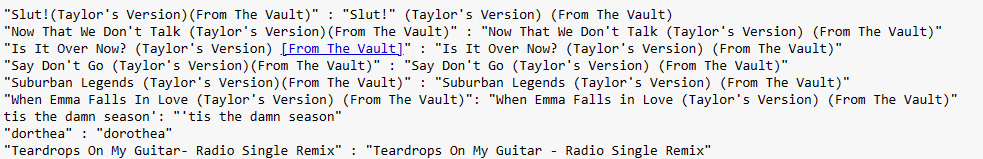

In [180]:
# Will first attempt update with top_songs with renames, then will run another merge and check merge flags. 

merge_song_title_renames = {'"Slut!"(Taylor\'s Version)(From The Vault)' : '"Slut!" (Taylor\'s Version) (From The Vault)',
                            "Now That We Don't Talk (Taylor's Version)(From The Vault)" : "Now That We Don't Talk (Taylor's Version) (From The Vault)",
                            "Is It Over Now? (Taylor's Version) [From The Vault]" : "Is It Over Now? (Taylor's Version) (From The Vault)",
                            "Say Don't Go (Taylor's Version)(From The Vault)" : "Say Don't Go (Taylor's Version) (From The Vault)",
                            "Suburban Legends (Taylor's Version)(From The Vault)" : "Suburban Legends (Taylor's Version) (From The Vault)",
                            "When Emma Falls In Love (Taylor's Version) (From The Vault)": "When Emma Falls in Love (Taylor's Version) (From The Vault)",
                            "'tis the damn season'": "'tis the damn season",
                             "dorthea" : "dorothea",
                             "Teardrops On My Guitar- Radio Single Remix" : "Teardrops On My Guitar - Radio Single Remix"}

In [181]:
top_songs['song_title'].replace(merge_song_title_renames, inplace=True)

In [182]:
top_songs['song_title']

0                Is It Over Now? (Taylor's Version) (From The Vault)
1         Now That We Don't Talk (Taylor's Version) (From The Vault)
2                        "Slut!" (Taylor's Version) (From The Vault)
4                   Say Don't Go (Taylor's Version) (From The Vault)
5                                                       Cruel Summer
6                                       Bad Blood (Taylor's Version)
8                                           Style (Taylor's Version)
9               Suburban Legends (Taylor's Version) (From The Vault)
11                                    Blank Space (Taylor's Version)
13                            Welcome To New York (Taylor's Version)
15                               Out Of The Woods (Taylor's Version)
18                                 Wildest Dreams (Taylor's Version)
19                     All You Had To Do Was Stay (Taylor's Version)
27                                   Shake It Off (Taylor's Version)
28                                

In [183]:
top_songs_final = top_songs

exported top_songs_final as df for reference

In [184]:
# Rerun unique song names and apply to new, accurate for lop

top_songs_unique_final2 = top_songs_final['song_title'].unique()

In [185]:
top_songs_unique_final2.shape

(193,)

In [186]:
top_songs_unique_final2

array(["Is It Over Now? (Taylor's Version) (From The Vault)",
       "Now That We Don't Talk (Taylor's Version) (From The Vault)",
       '"Slut!" (Taylor\'s Version) (From The Vault)',
       "Say Don't Go (Taylor's Version) (From The Vault)", 'Cruel Summer',
       "Bad Blood (Taylor's Version)", "Style (Taylor's Version)",
       "Suburban Legends (Taylor's Version) (From The Vault)",
       "Blank Space (Taylor's Version)",
       "Welcome To New York (Taylor's Version)",
       "Out Of The Woods (Taylor's Version)",
       "Wildest Dreams (Taylor's Version)",
       "All You Had To Do Was Stay (Taylor's Version)",
       "Shake It Off (Taylor's Version)",
       "New Romantics (Taylor's Version)", "Clean (Taylor's Version)",
       "I Wish You Would (Taylor's Version)",
       "I Know Places (Taylor's Version)",
       "Wonderland (Taylor's Version)",
       "How You Get The Girl (Taylor's Version)",
       "This Love (Taylor's Version)",
       "You Are In Love (Taylor's Version)

Will use updated list to create updated for loop

In [187]:
# Create updated for loop

top_2 = []

for value in song_stream_merge['song_title']:
    if value in ["Is It Over Now? (Taylor's Version) (From The Vault)",
       "Now That We Don't Talk (Taylor's Version) (From The Vault)",
       '"Slut!" (Taylor\'s Version) (From The Vault)',
       "Say Don't Go (Taylor's Version) (From The Vault)", 'Cruel Summer',
       "Bad Blood (Taylor's Version)", "Style (Taylor's Version)",
       "Suburban Legends (Taylor's Version) (From The Vault)",
       "Blank Space (Taylor's Version)",
       "Welcome To New York (Taylor's Version)",
       "Out Of The Woods (Taylor's Version)",
       "Wildest Dreams (Taylor's Version)",
       "All You Had To Do Was Stay (Taylor's Version)",
       "Shake It Off (Taylor's Version)",
       "New Romantics (Taylor's Version)", "Clean (Taylor's Version)",
       "I Wish You Would (Taylor's Version)",
       "I Know Places (Taylor's Version)",
       "Wonderland (Taylor's Version)",
       "How You Get The Girl (Taylor's Version)",
       "This Love (Taylor's Version)",
       "You Are In Love (Taylor's Version)", 'Anti-Hero',
       "I Can See You (Taylor's Version) (From The Vault)", 'Blank Space',
       "Enchanted (Taylor's Version)",
       "Back To December (Taylor's Version)", "Mine (Taylor's Version)",
       "Sparks Fly (Taylor's Version)", "Dear John (Taylor's Version)",
       "Better Than Revenge (Taylor's Version)",
       "Speak Now (Taylor's Version)",
       "When Emma Falls in Love (Taylor's Version) (From The Vault)",
       "Mean (Taylor's Version)",
       "Foolish One (Taylor's Version) (From The Vault)",
       "The Story Of Us (Taylor's Version)",
       "Timeless (Taylor's Version) (From The Vault)",
       "Haunted (Taylor's Version)", "Long Live (Taylor's Version)",
       "Last Kiss (Taylor's Version)", "Never Grow Up (Taylor's Version)",
       "Innocent (Taylor's Version)", "Ours (Taylor's Version)",
       "Superman (Taylor's Version)", 'Hits Different', 'Karma',
       'Lavender Haze', 'Bejeweled', 'Midnight Rain', 'Maroon',
       "You're On Your Own, Kid", 'Vigilante Shit', 'Question...?',
       'Mastermind', 'Labyrinth', 'Sweet Nothing',
       "Would've, Could've, Should've", 'The Great War',
       'Bigger Than The Whole Sky', 'Paris', 'High Infidelity', 'Glitch',
       'Dear Reader', "All Too Well (Taylor's Version)",
       "Message In A Bottle (Taylor's Version) (From The Vault)",
       "Red (Taylor's Version)", "State Of Grace (Taylor's Version)",
       "I Knew You Were Trouble (Taylor's Version)",
       "Better Man (Taylor's Version) (From The Vault)",
       "22 (Taylor's Version)", "Treacherous (Taylor's Version)",
       "We Are Never Ever Getting Back Together (Taylor's Version)",
       "I Almost Do (Taylor's Version)",
       "The Very First Night (Taylor's Version) (From The Vault)",
       "Stay Stay Stay (Taylor's Version)",
       "Babe (Taylor's Version) (From The Vault)",
       "Holy Ground (Taylor's Version)", "Begin Again (Taylor's Version)",
       "Forever Winter (Taylor's Version) (From The Vault)",
       "The Moment I Knew (Taylor's Version)",
       "The Lucky One (Taylor's Version)",
       "Sad Beautiful Tragic (Taylor's Version)",
       "Come Back...Be Here (Taylor's Version)",
       "Starlight (Taylor's Version)", 'willow',
       "Mr. Perfectly Fine (Taylor's Version) (From The Vault)",
       "Love Story (Taylor's Version)",
       "Forever & Always (Taylor's Version)",
       "Fearless (Taylor's Version)",
       "You Belong With Me (Taylor's Version)",
       "Fifteen (Taylor's Version)",
       "The Way I Loved You (Taylor's Version)", 'champagne problems',
       "'tis the damn season", 'gold rush', 'tolerate it', 'happiness',
       'ivy', 'dorothea', 'long story short', 'cowboy like me',
       'marjorie', 'closure', 'cardigan', 'the 1',
       'the last great american dynasty', 'my tears ricochet', 'august',
       'invisible string', 'betty', 'mirrorball', 'seven',
       'this is me trying', 'illicit affairs', 'mad woman', 'epiphany',
       'peace', 'hoax', 'The Man', 'Lover', 'You Need To Calm Down',
       'I Forgot That You Existed', 'The Archer', 'Paper Rings',
       'Miss Americana & The Heartbreak Prince', 'I Think He Knows',
       'Cornelia Street', 'London Boy', 'Death By A Thousand Cuts',
       'Afterglow', 'False God', 'Daylight', "It's Nice To Have A Friend",
       'Delicate', '...Ready For It?', 'Look What You Made Me Do',
       'Call It What You Want', 'Gorgeous', 'New Romantics',
       'Wildest Dreams', 'Out Of The Woods', 'Shake It Off', 'Style',
       'You Are In Love', 'Wonderland', 'Welcome To New York', 'Red',
       '22', 'I Knew You Were Trouble.', 'Begin Again',
       'We Are Never Ever Getting Back Together', 'The Moment I Knew',
       'I Almost Do', 'All Too Well', 'Stay Stay Stay', 'State Of Grace',
       'Ours', 'Sparks Fly', 'If This Was A Movie', 'Superman', 'Haunted',
       'Mean', 'The Story Of Us', 'Back To December', 'Mine', 'Innocent',
       'Dear John', 'Better Than Revenge', 'Last Kiss', 'Enchanted',
       'Never Grow Up', 'Long Live', 'Speak Now', 'Fearless',
       'You Belong With Me', 'Fifteen', 'Jump Then Fall', 'Untouchable',
       'The Other Side Of The Door', 'Forever & Always', 'Superstar',
       'Come In With The Rain', 'Love Story', 'White Horse',
       "You're Not Sorry", 'The Way I Loved You', 'Hey Stephen',
       "Should've Said No", 'Change', 'Picture To Burn', 'Our Song',
       'Teardrops On My Guitar - Radio Single Remix', 'Tim McGraw']:
        top_2.append('top song')
    else:
        top_2.append('not top')

In [188]:
# Merge updated/accurate list with dataframe to replace prior top_song inaccurate flag attempt

song_stream_merge['top_song'] = top_2

In [189]:
song_stream_merge.head()

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,track_number_str,album_id,song_id,days_since_release,tot_spot_plays_song,track_length_secs,last_stream_update,_merge,streams_normal,top_song
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,1,1989TV,1989TV01,13,35521714,212,11/9/2023,both,2732439,top song
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,2,1989TV,1989TV02,13,40958068,231,11/9/2023,both,3150620,top song
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,3,1989TV,1989TV03,13,47687102,231,11/9/2023,both,3668238,top song
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,4,1989TV,1989TV04,13,37545128,235,11/9/2023,both,2888086,top song
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,5,1989TV,1989TV05,13,31008534,193,11/9/2023,both,2385271,top song


In [190]:
song_stream_merge['top_song'].value_counts(dropna=False)

top_song
top song    192
not top      93
Name: count, dtype: int64

In [191]:
song_stream_merge.shape

(285, 25)

Top_song flag appears to be accurately updated. Will add a boolean value for loop in another column to mark top or not

## Create a for loop with boolean value to designate top song

In [192]:
# Create for loop with boolean values

bool_top = []

for value in song_stream_merge['top_song']:
    if value == 'top song':
        bool_top.append(True)
    else:
        bool_top.append(False)

# Counts for "true" should match counts for "top song" (192) 

In [193]:
# Assign bool_top list values to new column

song_stream_merge['top_song_flag'] = bool_top

In [194]:
song_stream_merge.head(20)

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,album_id,song_id,days_since_release,tot_spot_plays_song,track_length_secs,last_stream_update,_merge,streams_normal,top_song,top_song_flag
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,1989TV,1989TV01,13,35521714,212,11/9/2023,both,2732439,top song,True
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,1989TV,1989TV02,13,40958068,231,11/9/2023,both,3150620,top song,True
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,1989TV,1989TV03,13,47687102,231,11/9/2023,both,3668238,top song,True
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,1989TV,1989TV04,13,37545128,235,11/9/2023,both,2888086,top song,True
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,1989TV,1989TV05,13,31008534,193,11/9/2023,both,2385271,top song,True
5,Shake It Off (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,6,0.012,0.636,0.808,0.000,0.359,-5.693,...,1989TV,1989TV06,13,29684734,219,11/9/2023,both,2283441,top song,True
6,I Wish You Would (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,7,0.004,0.670,0.858,0.000,0.069,-6.528,...,1989TV,1989TV07,13,27727454,207,11/9/2023,both,2132881,top song,True
7,Bad Blood (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,8,0.036,0.618,0.683,0.000,0.305,-6.438,...,1989TV,1989TV08,13,26353077,211,11/9/2023,both,2027159,top song,True
8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,9,0.044,0.589,0.674,0.000,0.112,-7.480,...,1989TV,1989TV09,13,543373389,220,11/9/2023,both,41797953,top song,True
9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,10,0.002,0.758,0.691,0.000,0.094,-5.798,...,1989TV,1989TV10,13,24935822,247,11/9/2023,both,1918140,top song,True


In [195]:
song_stream_merge['top_song_flag'].value_counts(dropna=False)

top_song_flag
True     192
False     93
Name: count, dtype: int64

Counts allign with top_song values, accurate flag.

In [196]:
song_stream_merge['top_song_flag'].dtype

dtype('bool')

In [197]:
# Create additional column to make bool types numeric

bool_num = []

for value in song_stream_merge['top_song_flag']:
        if value == True:
            bool_num.append(1)
        else:
            bool_num.append(0)

#This will allow for correlation stats and relationship analysis

In [198]:
song_stream_merge['top_song_value'] = bool_num

In [199]:
song_stream_merge['top_song_value'].value_counts(dropna=False)

top_song_value
1    192
0     93
Name: count, dtype: int64

In [200]:
song_stream_merge.shape

(285, 27)

## Create a count of songs that made the billboard hot 100 and add to song_stream_merge df

In [201]:
song_stream_merge['top_song'].value_counts(dropna=False)

top_song
top song    192
not top      93
Name: count, dtype: int64

In [202]:
# Use groupby() to identify how many top songs each album has

count_by_album = song_stream_merge.groupby(['album_id', 'top_song']).size().reset_index(name='count')

In [203]:
count_by_album

,album_id,top_song,count
0,1989,not top,10
1,1989,top song,9
2,1989TV,not top,1
3,1989TV,top song,21
4,DEBUT,not top,10
5,DEBUT,top song,5
6,EVER,not top,6
7,EVER,top song,11
8,FEAR,not top,4
9,FEAR,top song,15


In [204]:
# Create a for loop to assign number of top songs to each album


cnt_top_songs= []

for value in song_stream_merge['album_id']:
    if value == "1989":
        cnt_top_songs.append(5)
    elif value == "DEBUT":
        cnt_top_songs.append(1)
    elif value == "REP":
        cnt_top_songs.append(6)
    elif value == "FEAR":
        cnt_top_songs.append(2)
    elif value == "LOVE":
        cnt_top_songs.append(7)
    elif value == "SPEAK":
        cnt_top_songs.append(3)
    elif value == "RED":
        cnt_top_songs.append(4)
    elif value == "FOLK":
        cnt_top_songs.append(8)
    elif value == "EVER":
        cnt_top_songs.append(9)
    elif value == "FEARTV":
        cnt_top_songs.append(10)
    elif value == "REDTV":
        cnt_top_songs.append(11)
    elif value == "MIDN":
        cnt_top_songs.append(12)
    elif value == "SPEAKTV":
        cnt_top_songs.append(13)
    elif value == "1989TV":
        cnt_top_songs.append(14)
    else:
        cnt_top_songs.append("unknown")

In [205]:
song_stream_merge['top_s_cnt'] = cnt_top_songs

In [206]:
song_stream_merge.columns

Index(['song_title', 'album_title', 'album_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', '_merge', 'streams_normal',
       'top_song', 'top_song_flag', 'top_song_value', 'top_s_cnt'],
      dtype='object')

In [207]:
song_stream_merge['top_s_cnt'].value_counts(dropna=False)

top_s_cnt
11    30
10    26
12    23
14    22
13    22
4     22
3     20
5     19
2     19
7     18
9     17
8     17
6     15
1     15
Name: count, dtype: int64

# 05.  Add Taylor's Version delineation to dataframe 

In [208]:
# Create for loop for Taylor's Version, usig album_ids
tv = []

for value in song_stream_merge['album_id']:
    if value == "1989":
        tv.append("original")
    elif value == "DEBUT":
        tv.append("original")
    elif value == "REP":
        tv.append("original")
    elif value == "FEAR":
        tv.append("original")
    elif value == "LOVE":
        tv.append("original")
    elif value == "SPEAK":
        tv.append("original")
    elif value == "RED":
        tv.append("original")
    elif value == "FOLK":
        tv.append("original")
    elif value == "EVER":
        tv.append("original")
    elif value == "FEARTV":
        tv.append("Taylor's Version")
    elif value == "REDTV":
        tv.append("Taylor's Version")
    elif value == "MIDN":
        tv.append("original")
    elif value == "SPEAKTV":
        tv.append("Taylor's Version")
    elif value == "1989TV":
        tv.append("Taylor's Version")
    else:
        tv.append("unknown")

In [209]:
song_stream_merge['tv'] = tv

In [210]:
song_stream_merge.shape

(285, 29)

In [211]:
song_stream_merge.head()

,song_title,album_title,album_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,tot_spot_plays_song,track_length_secs,last_stream_update,_merge,streams_normal,top_song,top_song_flag,top_song_value,top_s_cnt,tv
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,35521714,212,11/9/2023,both,2732439,top song,True,1,14,Taylor's Version
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,40958068,231,11/9/2023,both,3150620,top song,True,1,14,Taylor's Version
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,47687102,231,11/9/2023,both,3668238,top song,True,1,14,Taylor's Version
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,37545128,235,11/9/2023,both,2888086,top song,True,1,14,Taylor's Version
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,31008534,193,11/9/2023,both,2385271,top song,True,1,14,Taylor's Version


In [212]:
song_stream_merge.groupby('album_id')['tv'].value_counts().unstack(fill_value=0)

tv,Taylor's Version,original
album_id,,
1989,0,19
1989TV,22,0
DEBUT,0,15
EVER,0,17
FEAR,0,19
FEARTV,26,0
FOLK,0,17
LOVE,0,18
MIDN,0,23


# 06. Add album number variable to dataframe

This will help identify correlations with other variables and which album is being released. This could also track popularity over time. 

In [213]:
# Create for loop for album_number, using album_ids due to use of deluxe/longest versions of albums

alb_num = []

for value in song_stream_merge['album_id']:
    if value == "1989":
        alb_num.append(5)
    elif value == "DEBUT":
        alb_num.append(1)
    elif value == "REP":
        alb_num.append(6)
    elif value == "FEAR":
        alb_num.append(2)
    elif value == "LOVE":
        alb_num.append(7)
    elif value == "SPEAK":
        alb_num.append(3)
    elif value == "RED":
        alb_num.append(4)
    elif value == "FOLK":
        alb_num.append(8)
    elif value == "EVER":
        alb_num.append(9)
    elif value == "FEARTV":
        alb_num.append(10)
    elif value == "REDTV":
        alb_num.append(11)
    elif value == "MIDN":
        alb_num.append(12)
    elif value == "SPEAKTV":
        alb_num.append(13)
    elif value == "1989TV":
        alb_num.append(14)
    else:
        alb_num.append("unknown")

In [214]:
song_stream_merge['alb_num'] = alb_num

In [215]:
song_stream_merge.shape

(285, 30)

In [216]:
song_stream_merge['alb_num'].value_counts(dropna=False)

alb_num
11    30
10    26
12    23
14    22
13    22
4     22
3     20
5     19
2     19
7     18
9     17
8     17
6     15
1     15
Name: count, dtype: int64

In [217]:
song_stream_merge.groupby('album_id')['alb_num'].value_counts().unstack(fill_value=0)

alb_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14
album_id,,,,,,,,,,,,,,
1989,0,0,0,0,19,0,0,0,0,0,0,0,0,0
1989TV,0,0,0,0,0,0,0,0,0,0,0,0,0,22
DEBUT,15,0,0,0,0,0,0,0,0,0,0,0,0,0
EVER,0,0,0,0,0,0,0,0,17,0,0,0,0,0
FEAR,0,19,0,0,0,0,0,0,0,0,0,0,0,0
FEARTV,0,0,0,0,0,0,0,0,0,26,0,0,0,0
FOLK,0,0,0,0,0,0,0,17,0,0,0,0,0,0
LOVE,0,0,0,0,0,0,18,0,0,0,0,0,0,0
MIDN,0,0,0,0,0,0,0,0,0,0,0,23,0,0


# 05. album_sales review, wrangle, merge

In [218]:
# Check import

alb_sales.head()

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,chart_date,w1_trad_album_sales
0,DEBUT,Debut,June,19,2006,2006-06-19,October,24,2006,2006-10-24,NaN,39000
1,FEAR,Fearless,September,15,2008,2008-09-15,November,11,2008,2008-11-11,NaN,592300
2,SPEAK,Speak Now,August,4,2010,2010-08-04,October,25,2010,2010-10-25,NaN,1047000
3,RED,Red,August,13,2012,2012-08-13,October,22,2012,2012-10-22,NaN,1208000
4,1989,1989,August,19,2014,2014-08-19,November,15,2014,2014-11-15,NaN,1297000


In [219]:
alb_sales.columns

Index(['album_id', 'album_title', 'album_announce_mo', 'album_announce_day',
       'album_announce_yr', 'album_announce_date', 'album_release_mo',
       'album_release_day', 'album_release_year', 'album_release_date',
       'chart_date', 'w1_trad_album_sales'],
      dtype='object')

In [220]:
alb_sales.shape

(14, 12)

In [221]:
alb_sales

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,chart_date,w1_trad_album_sales
0,DEBUT,Debut,June,19,2006,2006-06-19,October,24,2006,2006-10-24,NaN,39000
1,FEAR,Fearless,September,15,2008,2008-09-15,November,11,2008,2008-11-11,NaN,592300
2,SPEAK,Speak Now,August,4,2010,2010-08-04,October,25,2010,2010-10-25,NaN,1047000
3,RED,Red,August,13,2012,2012-08-13,October,22,2012,2012-10-22,NaN,1208000
4,1989,1989,August,19,2014,2014-08-19,November,15,2014,2014-11-15,NaN,1297000
5,REP,reputation,August,24,2017,2017-08-24,November,10,2017,2017-11-10,2017-12-02,1216000
6,LOVE,Lover,June,13,2019,2019-06-13,August,23,2019,2019-08-23,2019-09-07,679000
7,FOLK,folklore,July,24,2020,2020-07-24,July,24,2020,2020-07-24,2020-08-08,615000
8,EVER,evermore,December,10,2020,2020-12-10,December,11,2020,2020-12-11,2020-12-26,154500
9,FEARTV,Fearless (Taylor's Version),February,11,2021,2021-02-11,April,9,2021,2021-04-09,2021-04-24,179000


In [222]:
columns_for_alb_sales = ['album_id', 'album_title', 'album_announce_mo', 'album_announce_day','album_announce_yr', 'album_announce_date', 'album_release_mo', 'album_release_day', 'album_release_year', 'album_release_date', 'w1_trad_album_sales']

In [223]:
# Create subset of alb_sales to merge with song_stream_merge

alb_sales_sub = alb_sales[columns_for_alb_sales]

In [224]:
alb_sales_sub

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,w1_trad_album_sales
0,DEBUT,Debut,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000
1,FEAR,Fearless,September,15,2008,2008-09-15,November,11,2008,2008-11-11,592300
2,SPEAK,Speak Now,August,4,2010,2010-08-04,October,25,2010,2010-10-25,1047000
3,RED,Red,August,13,2012,2012-08-13,October,22,2012,2012-10-22,1208000
4,1989,1989,August,19,2014,2014-08-19,November,15,2014,2014-11-15,1297000
5,REP,reputation,August,24,2017,2017-08-24,November,10,2017,2017-11-10,1216000
6,LOVE,Lover,June,13,2019,2019-06-13,August,23,2019,2019-08-23,679000
7,FOLK,folklore,July,24,2020,2020-07-24,July,24,2020,2020-07-24,615000
8,EVER,evermore,December,10,2020,2020-12-10,December,11,2020,2020-12-11,154500
9,FEARTV,Fearless (Taylor's Version),February,11,2021,2021-02-11,April,9,2021,2021-04-09,179000


In [225]:
# Merge album sales information with song_stream_merge

song_stream_alb_merge = song_stream_merge.merge(alb_sales_sub, how='left', on = ['album_id'], indicator ="alb_add")

In [226]:
song_stream_alb_merge['alb_add'].value_counts(dropna=False)

alb_add
both          285
left_only       0
right_only      0
Name: count, dtype: int64

In [227]:
song_stream_alb_merge.shape

(285, 41)

In [228]:
song_stream_alb_merge.tail(15)

,song_title,album_title_x,album_release_date_x,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date_y,w1_trad_album_sales,alb_add
270,Tim McGraw,Debut,10/24/2006,1,0.575,0.580,0.491,0.000,0.121,-6.462,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both
271,Picture To Burn,Debut,10/24/2006,2,0.173,0.658,0.877,0.000,0.096,-2.098,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both
272,Teardrops On My Guitar - Radio Single Remix,Debut,10/24/2006,3,0.288,0.621,0.417,0.000,0.119,-6.941,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both
273,A Place in this World,Debut,10/24/2006,4,0.051,0.576,0.777,0.000,0.320,-2.881,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both
274,Cold As You,Debut,10/24/2006,5,0.217,0.418,0.482,0.000,0.123,-5.769,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both
275,The Outside,Debut,10/24/2006,6,0.005,0.589,0.805,0.000,0.240,-4.055,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both
276,Tied Together with a Smile,Debut,10/24/2006,7,0.525,0.479,0.578,0.000,0.084,-4.963,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both
277,Stay Beautiful,Debut,10/24/2006,8,0.087,0.594,0.629,0.000,0.137,-4.919,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both
278,Should've Said No,Debut,10/24/2006,9,0.010,0.476,0.777,0.000,0.196,-3.771,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both
279,Mary's Song (Oh My My My),Debut,10/24/2006,10,0.018,0.403,0.627,0.000,0.182,-5.280,...,June,19,2006,2006-06-19,October,24,2006,2006-10-24,39000,both


In [229]:
song_stream_alb_merge.columns

Index(['song_title', 'album_title_x', 'album_release_date_x', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', '_merge', 'streams_normal',
       'top_song', 'top_song_flag', 'top_song_value', 'top_s_cnt', 'tv',
       'alb_num', 'album_title_y', 'album_announce_mo', 'album_announce_day',
       'album_announce_yr', 'album_announce_date', 'album_release_mo',
       'album_release_day', 'album_release_year', 'album_release_date_y',
       'w1_trad_album_sales', 'alb_add'],
      dtype='object')

In [230]:
# Drop album_title_y, _merge and alb_add columns

song_stream_alb_merge.drop(columns = ['album_title_y', '_merge', 'alb_add'], inplace=True)

In [231]:
# Rename album_title_x and release dates and 

song_stream_alb_merge.rename(columns = {'album_title_x': 'album_title', 'album_release_date_x': 'song_release_date', 'album_release_date_y': 'album_release_date'}, inplace = True)

In [232]:
#check drops and renames

song_stream_alb_merge.columns

Index(['song_title', 'album_title', 'song_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', 'streams_normal', 'top_song',
       'top_song_flag', 'top_song_value', 'top_s_cnt', 'tv', 'alb_num',
       'album_announce_mo', 'album_announce_day', 'album_announce_yr',
       'album_announce_date', 'album_release_mo', 'album_release_day',
       'album_release_year', 'album_release_date', 'w1_trad_album_sales'],
      dtype='object')

In [233]:
check_title_unique = song_stream_alb_merge['album_title'].unique()

In [234]:
check_title_unique

array(["1989 (Taylor's Version)[Deluxe]", "Speak Now (Taylor's Version)",
       'Midnights (The Til Dawn Edition)', "Red (Taylor's Version)",
       "Fearless (Taylor's Version)", 'evermore (deluxe version)',
       'folklore (deluxe version)', 'Lover', 'reputation',
       '1989 (Deluxe Edition)', 'Red (Deluxe Edition)',
       'Speak Now (Deluxe Edition)', 'Fearless Platinum Edition', 'Debut'],
      dtype=object)

# 07. bill_top_alb_ts review, wrangle, merge

In [235]:
# Review data frame

bill_alb.head()

,chart_week,alb_current_pos,alb_title,artist,last_week,peak_pos,wks_on_chart
0,11/11/2023,1,1989 (Taylor's Version),Taylor Swift,0,1,1
6,11/11/2023,7,Midnights,Taylor Swift,6,1,54
7,11/11/2023,8,Lover,Taylor Swift,7,1,219
13,11/11/2023,14,Folklore,Taylor Swift,12,1,171
18,11/11/2023,19,Speak Now (Taylor's Version),Taylor Swift,20,1,17


In [236]:
bill_alb.shape

(2568, 7)

This means that from within this time period, TS had an album appear within the top 200 2568 times. These have repeated albums, which I will isolate below.

In [237]:
bill_alb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2568 entries, 0 to 177618
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   chart_week       2568 non-null   object
 1   alb_current_pos  2568 non-null   int64 
 2   alb_title        2568 non-null   object
 3   artist           2568 non-null   object
 4   last_week        2568 non-null   int64 
 5   peak_pos         2568 non-null   int64 
 6   wks_on_chart     2568 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 160.5+ KB


In [238]:
# List of unique albums

bill_alb_unique = bill_alb['alb_title'].unique()

In [239]:
bill_alb_unique

array(["1989 (Taylor's Version)", 'Midnights', 'Lover', 'Folklore',
       "Speak Now (Taylor's Version)", "Red (Taylor's Version)",
       'reputation', 'Evermore', '1989', "Fearless (Taylor's Version)",
       'Taylor Swift', 'Speak Now',
       'Folklore: The Long Pond Studio Sessions (Soundtrack)',
       'Lover: Live From Paris', 'Red', 'Fearless',
       'The Taylor Swift Holiday Collection (EP)',
       'Speak Now: World Tour Live CD + DVD', 'Beautiful Eyes (EP)'],
      dtype=object)

In [240]:
bill_alb_unique.shape

(19,)

In [241]:
bill_alb['alb_title'].value_counts(dropna=False)

alb_title
1989                                                    464
Taylor Swift                                            284
reputation                                              267
Fearless                                                261
Lover                                                   219
Speak Now                                               193
Red                                                     185
Folklore                                                171
Evermore                                                151
Fearless (Taylor's Version)                             121
Red (Taylor's Version)                                  103
Midnights                                                54
The Taylor Swift Holiday Collection (EP)                 43
Beautiful Eyes (EP)                                      21
Speak Now (Taylor's Version)                             17
Speak Now: World Tour Live CD + DVD                      11
Lover: Live From Paris        

In [242]:
# Removing all non-studio albums

alb_removal = ['The Taylor Swift Holiday Collection (EP)', 'Beautiful Eyes (EP)', 'Speak Now: World Tour Live CD + DVD','Lover: Live From Paris', 'Folklore: The Long Pond Studio Sessions (Soundtrack)']
               
            # Note: future analysis could include non-studio albums that made the top charts.
            # Also a reminder that 1989TV has a small count due to the time of the analysis, which was only two weeks after it's release

In [243]:
# Remove albums from dataframe

bill_alb = bill_alb[~bill_alb['alb_title'].isin(alb_removal)]

#Should have 19-5 = 14 remaining (this means that there is a complete match and every album in this analysis has maade the chart!)

In [244]:
bill_alb['alb_title'].value_counts(dropna=False)

alb_title
1989                            464
Taylor Swift                    284
reputation                      267
Fearless                        261
Lover                           219
Speak Now                       193
Red                             185
Folklore                        171
Evermore                        151
Fearless (Taylor's Version)     121
Red (Taylor's Version)          103
Midnights                        54
Speak Now (Taylor's Version)     17
1989 (Taylor's Version)           1
Name: count, dtype: int64

In [245]:
bill_alb_unique_2 = bill_alb['alb_title'].unique()

In [246]:
# Should match 14, and be all studio albums from analysis

bill_alb_unique_2.shape

(14,)

In [247]:
# Replace album titles to match all dataframse

bill_alb['alb_title'].replace({"Taylor Swift":"Debut", "Folklore":"folklore", "Evermore": "evermore"}, inplace=True)

In [248]:
bill_alb['alb_title'].value_counts(dropna=False)

alb_title
1989                            464
Debut                           284
reputation                      267
Fearless                        261
Lover                           219
Speak Now                       193
Red                             185
folklore                        171
evermore                        151
Fearless (Taylor's Version)     121
Red (Taylor's Version)          103
Midnights                        54
Speak Now (Taylor's Version)     17
1989 (Taylor's Version)           1
Name: count, dtype: int64

Successful rename, will add album ids to each

## Add album_id to bill_alb

In [249]:
# Will assign album_ids to each album in order to be able to merge, using for loop


bill_alb_id = []

for value in bill_alb['alb_title']:
    if value == "1989":
        bill_alb_id.append("1989")
    elif value == "Debut":
        bill_alb_id.append("DEBUT")
    elif value == "reputation":
        bill_alb_id.append("REP")
    elif value == "Fearless":
        bill_alb_id.append("FEAR")
    elif value == "Lover":
        bill_alb_id.append("LOVE")
    elif value == "Speak Now":
        bill_alb_id.append("SPEAK")
    elif value == "Red":
        bill_alb_id.append("RED")
    elif value == "folklore":
        bill_alb_id.append("FOLK")
    elif value == "evermore":
        bill_alb_id.append("EVER")
    elif value == "Fearless (Taylor's Version)":
        bill_alb_id.append("FEARTV")
    elif value == "Red (Taylor's Version)":
        bill_alb_id.append("REDTV")
    elif value == "Midnights":
        bill_alb_id.append("MIDN")
    elif value == "Speak Now (Taylor's Version)":
        bill_alb_id.append("SPEAKTV")
    elif value == "1989 (Taylor's Version)":
        bill_alb_id.append("1989TV")
    else:
        bool_top.append("unknown")


In [250]:
bill_alb['album_id'] = bill_alb_id

In [251]:
bill_alb.shape

(2491, 8)

In [252]:
bill_alb['album_id'].value_counts(dropna=False)

album_id
1989       464
DEBUT      284
REP        267
FEAR       261
LOVE       219
SPEAK      193
RED        185
FOLK       171
EVER       151
FEARTV     121
REDTV      103
MIDN        54
SPEAKTV     17
1989TV       1
Name: count, dtype: int64

In [253]:
# Review to make sure ids match album_titles

bill_alb['alb_title'].value_counts(dropna=False)

alb_title
1989                            464
Debut                           284
reputation                      267
Fearless                        261
Lover                           219
Speak Now                       193
Red                             185
folklore                        171
evermore                        151
Fearless (Taylor's Version)     121
Red (Taylor's Version)          103
Midnights                        54
Speak Now (Taylor's Version)     17
1989 (Taylor's Version)           1
Name: count, dtype: int64

## Add billboard top album count for number of top 200 to song dataframe

Original plan was to create a flag representing whether or not an album made the top 200. However, since all of her studio albums have, I am creating a for loop to show the count of top 200. This can be normalized (along with other values) based on days since album release

In [254]:
# Check song df prior to for loop

song_stream_alb_merge.shape

(285, 38)

In [255]:
song_stream_alb_merge.head()

,song_title,album_title,song_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,alb_num,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,w1_trad_album_sales
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,14,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,14,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,14,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,14,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,14,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000


In [256]:
# Create for loop for number of top album chart weeks, using album_ids due to use of deluxe/longest versions of albums

top_alb_count = []

for value in song_stream_alb_merge['album_id']:
    if value == "1989":
        top_alb_count.append(464)
    elif value == "DEBUT":
        top_alb_count.append(284)
    elif value == "REP":
        top_alb_count.append(267)
    elif value == "FEAR":
        top_alb_count.append(261)
    elif value == "LOVE":
        top_alb_count.append(219)
    elif value == "SPEAK":
        top_alb_count.append(193)
    elif value == "RED":
        top_alb_count.append(185)
    elif value == "FOLK":
        top_alb_count.append(171)
    elif value == "EVER":
        top_alb_count.append(151)
    elif value == "FEARTV":
        top_alb_count.append(121)
    elif value == "REDTV":
        top_alb_count.append(103)
    elif value == "MIDN":
        top_alb_count.append(54)
    elif value == "SPEAKTV":
        top_alb_count.append(17)
    elif value == "1989TV":
        top_alb_count.append(1)
    else:
        top_alb_count.append("unknown")

In [257]:
song_stream_alb_merge['top_alb_count'] = top_alb_count

In [258]:
song_stream_alb_merge.shape

(285, 39)

In [259]:
song_stream_alb_merge.head()

,song_title,album_title,song_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,w1_trad_album_sales,top_alb_count
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,August,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1


In [260]:
song_stream_alb_merge['top_alb_count'].value_counts(dropna=False)

top_alb_count
103    30
121    26
54     23
1      22
17     22
185    22
193    20
464    19
261    19
219    18
151    17
171    17
267    15
284    15
Name: count, dtype: int64

Top album counts match the number of tracks for each corresponding album.

In [261]:
song_stream_alb_merge['top_alb_count'].dtype

dtype('int64')

Export full song_stream_alb_merge with all updates

## Normalize number of top albums 
Create new variable to normalize streaming data- number top 200 album chart weeks divided by days_since release

This will allow to compare number of top songs even though albums and songs were released at different times and therefore have had longer to accumulate songs as of the November 9th , 2023  number of top Billboard 200 album totals

In [262]:
# Divide total number of top albums by days since release

song_stream_alb_merge['top_alb_normal'] = song_stream_alb_merge['top_alb_count'] / song_stream_alb_merge['days_since_release']


In [263]:
song_stream_alb_merge.head()

,song_title,album_title,song_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,w1_trad_album_sales,top_alb_count,top_alb_normal
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077


In [264]:
song_stream_alb_merge['top_alb_normal'].describe()

count   285.000
mean      0.109
std       0.044
min       0.041
25%       0.048
50%       0.136
75%       0.142
max       0.289
Name: top_alb_normal, dtype: float64

In [265]:
song_stream_alb_merge['top_alb_normal'].value_counts(dropna=False)

top_alb_normal
0.142    30
0.128    26
0.077    22
0.046    22
0.136    22
0.141    21
0.041    20
0.048    19
0.141    19
0.142    18
0.142    16
0.122    15
0.142    15
0.046    15
0.146     2
0.289     2
0.145     1
Name: count, dtype: int64

In [266]:
top_alb_norm_figures = song_stream_alb_merge.groupby('album_id')['top_alb_normal'].mean()

In [267]:
top_alb_norm_figures

album_id
1989      0.141
1989TV    0.077
DEBUT     0.046
EVER      0.142
FEAR      0.048
FEARTV    0.128
FOLK      0.142
LOVE      0.142
MIDN      0.154
RED       0.046
REDTV     0.142
REP       0.122
SPEAK     0.041
SPEAKTV   0.136
Name: top_alb_normal, dtype: float64

# 08. Create subset of song_stream_alb_merge based on top songs and bottom songs as defined by the spotify streams normalized (not top 100)

In [268]:
song_stream_alb_merge.columns

Index(['song_title', 'album_title', 'song_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', 'streams_normal', 'top_song',
       'top_song_flag', 'top_song_value', 'top_s_cnt', 'tv', 'alb_num',
       'album_announce_mo', 'album_announce_day', 'album_announce_yr',
       'album_announce_date', 'album_release_mo', 'album_release_day',
       'album_release_year', 'album_release_date', 'w1_trad_album_sales',
       'top_alb_count', 'top_alb_normal'],
      dtype='object')

<Axes: ylabel='Frequency'>

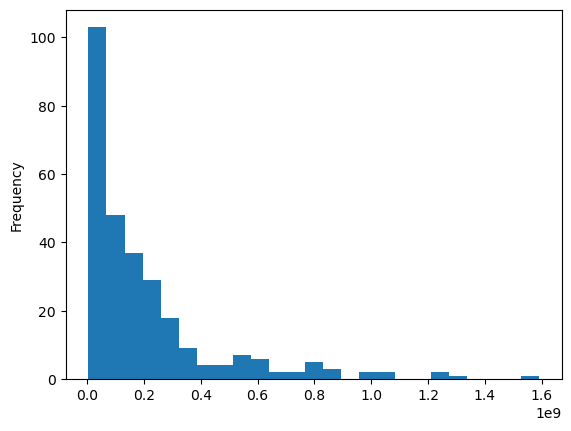

In [269]:
song_stream_alb_merge['tot_spot_plays_song'].plot.hist(bins=25)

In [270]:
song_stream_alb_merge['tot_spot_plays_song'].describe()

count          285.000
mean     209461645.677
std      252212279.994
min        4443209.000
25%       50126002.000
50%      117246328.000
75%      251669378.000
max     1591542049.000
Name: tot_spot_plays_song, dtype: float64

<Axes: ylabel='Frequency'>

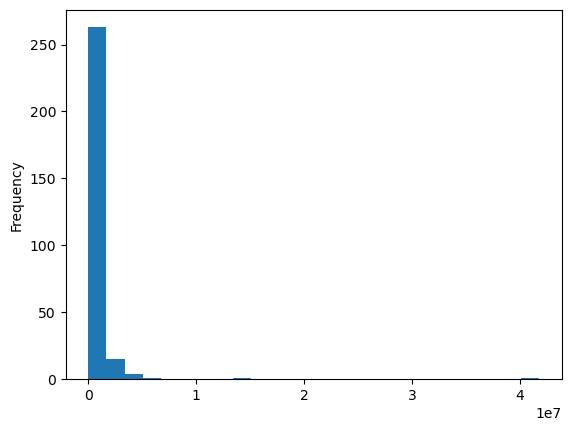

In [271]:
song_stream_alb_merge['streams_normal'].plot.hist(bins=25)

In [272]:
song_stream_alb_merge['streams_normal'].describe()

count        285.000
mean      612284.400
std      2695969.592
min         1346.000
25%        42499.000
50%       146344.000
75%       389058.000
max     41797953.000
Name: streams_normal, dtype: float64

In [273]:
top_song_by_tot_streams_sub = song_stream_alb_merge[song_stream_alb_merge['tot_spot_plays_song'] > 251669378]

In [274]:
top_song_by_tot_streams_sub.shape

(71, 40)

In [275]:
top_song_by_norm_stream_sub = song_stream_alb_merge[song_stream_alb_merge['streams_normal'] > 389058]

In [276]:
top_song_by_norm_stream_sub.shape

(71, 40)

Computed using both total and normal to see difference in "top" count, which are the same since one is a derivative

In [277]:
top_song_by_norm_stream_sub

,song_title,album_title,song_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,w1_trad_album_sales,top_alb_count,top_alb_normal
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
5,Shake It Off (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,6,0.012,0.636,0.808,0.000,0.359,-5.693,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
6,I Wish You Would (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,7,0.004,0.670,0.858,0.000,0.069,-6.528,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
7,Bad Blood (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,8,0.036,0.618,0.683,0.000,0.305,-6.438,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,9,0.044,0.589,0.674,0.000,0.112,-7.480,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077
9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,10,0.002,0.758,0.691,0.000,0.094,-5.798,...,9,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077


In [278]:
# Rename top streaming df

top_stream_songs = top_song_by_norm_stream_sub

In [279]:
not_top_stream_songs = song_stream_alb_merge[song_stream_alb_merge['streams_normal'] <= 389058]

In [280]:
not_top_stream_songs.shape

(214, 40)

214 not top count plus 71 top count means sucessfull groupings- 285 songs total

# 09.  Create aggregates dataframe of song_stream_alb_merge

In [281]:
song_stream_alb_merge.columns

Index(['song_title', 'album_title', 'song_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', 'streams_normal', 'top_song',
       'top_song_flag', 'top_song_value', 'top_s_cnt', 'tv', 'alb_num',
       'album_announce_mo', 'album_announce_day', 'album_announce_yr',
       'album_announce_date', 'album_release_mo', 'album_release_day',
       'album_release_year', 'album_release_date', 'w1_trad_album_sales',
       'top_alb_count', 'top_alb_normal'],
      dtype='object')

To remove as define new df for aggs: 
'song_title', 'song_release_date', 'track_length_secs', 'track_num_str', 'song_id', 'top_song_flag', 'top_song'
'top_song_value', 
To keep as is: 'album_title', 'album_id','alb_num', 'days_since_release', 
       'last_stream_update',
       'album_announce_mo', 'album_announce_day','album_announce_yr', 'album_announce_date', 
       'album_release_mo','album_release_day', 'album_release_year', 'album_release_date',
       'w1_trad_album_sales', , 'top_alb_normal'],

---------------------------
Want to add the following from song_stream_alb_merge dataframe

To aggregate (count): track_number as track_cnt

To aggregate ((min, median, max): (with renames to show aggs)
'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'song_popularity'

to aggregate (sum): 
'tot_spot_plays_song' as 'tot_alb_streams'
'streams_normal' as "total_alb_streams_norm", 


to aggregate as avg because it's the same for all rows for each of the albums: 
'top_s_cnt, 
'top_s_cnt' as 'top_s_cnt'
'top_alb_count' as 'bill_top_count'
'top_alb_normal' as 'bill_top_count_norm'
'days_since_release', 'top_alb_normal'

-------------------------------------
To remove from agg df (post aggs): , 'track_number', 'acousticness', 'danceability', 'energy', 'median', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'song_popularity'


 try out 

aggs_selected_columns = [add columns want to keep, start with cat]

try_again = df.groupby(['album_id', 'album_title']).agg({'loudness': 'mean'}).reset_index()[selected_columns]

## add number of tracks as a value

In [282]:
song_stream_alb_merge['alb_track_cnt'] = song_stream_alb_merge.groupby('album_id')['track_number'].transform('count')

In [283]:
song_stream_alb_merge['alb_track_cnt'].value_counts(dropna=False)

alb_track_cnt
22    66
19    38
17    34
30    30
15    30
26    26
23    23
20    20
18    18
Name: count, dtype: int64

In [284]:
song_stream_alb_merge.head()

,song_title,album_title,song_release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,w1_trad_album_sales,top_alb_count,top_alb_normal,alb_track_cnt
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009,0.757,0.610,0.000,0.367,-4.840,...,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077,22
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088,0.733,0.733,0.000,0.168,-5.376,...,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077,22
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000,0.511,0.822,0.020,0.090,-4.785,...,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077,22
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.001,0.545,0.885,0.000,0.385,-5.968,...,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077,22
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.001,0.588,0.721,0.000,0.131,-5.579,...,2023,2023-08-09,October,27,2023,2023-10-27,1359000,1,0.077,22


## Decide columns for aggregated df

In [285]:
song_stream_alb_merge.columns

Index(['song_title', 'album_title', 'song_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', 'streams_normal', 'top_song',
       'top_song_flag', 'top_song_value', 'top_s_cnt', 'tv', 'alb_num',
       'album_announce_mo', 'album_announce_day', 'album_announce_yr',
       'album_announce_date', 'album_release_mo', 'album_release_day',
       'album_release_year', 'album_release_date', 'w1_trad_album_sales',
       'top_alb_count', 'top_alb_normal', 'alb_track_cnt'],
      dtype='object')

In [286]:
# Specify specific columns want to include (both to keep and aggregate) for album agg df
# Columns for specific song information (not as aggregates) removed from df column list

alb_aggs = song_stream_alb_merge[['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt', # main song info
        'w1_trad_album_sales', 
        'tot_spot_plays_song','streams_normal','song_popularity',
        'top_s_cnt', 'top_alb_count', 'top_alb_normal', # performance measures
        'days_since_release',
       'album_announce_day', 'album_announce_yr', #release/time measures
       'album_release_day','album_release_year', 
       'acousticness', 'danceability', 'energy', 'instrumentalness', # all of these measures to be aggregated then delete column derivs
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'duration_ms']]


In [287]:
# check new df
alb_aggs.shape

(285, 27)

In [288]:
# check new df
alb_aggs.head()

,album_id,album_title,tv,alb_num,alb_track_cnt,w1_trad_album_sales,tot_spot_plays_song,streams_normal,song_popularity,top_s_cnt,...,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms
0,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14,22,1359000,35521714,2732439,80,14,...,0.009,0.757,0.610,0.000,0.367,-4.840,0.033,116.998,0.685,212600
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14,22,1359000,40958068,3150620,80,14,...,0.088,0.733,0.733,0.000,0.168,-5.376,0.067,96.057,0.701,231833
2,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14,22,1359000,47687102,3668238,81,14,...,0.000,0.511,0.822,0.020,0.090,-4.785,0.040,94.868,0.305,231000
3,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14,22,1359000,37545128,2888086,80,14,...,0.001,0.545,0.885,0.000,0.385,-5.968,0.045,92.021,0.206,235800
4,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14,22,1359000,31008534,2385271,79,14,...,0.001,0.588,0.721,0.000,0.131,-5.579,0.032,96.997,0.520,193289


# perform aggregates

to aggregate (sum): 
'tot_spot_plays_song' as 'tot_alb_streams'
'streams_normal' as "tot_alb_streams_norm", 

To aggregate ((min, median, max): (with renames to show aggs)
'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'song_popularity'

to aggregate as avg because it's the same for all rows for each of the albums: 
'top_s_cnt, 
'top_s_cnt' as 'top_s_cnt'
'top_alb_count' as 'bill_top_count'
'top_alb_normal' as 'bill_top_count_norm'
'days_since_release', 'top_alb_normal'

In [289]:
alb_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_spot_plays_song', 'streams_normal',
       'song_popularity', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_since_release', 'album_announce_day', 'album_announce_yr',
       'album_release_day', 'album_release_year', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'duration_ms'],
      dtype='object')

In [290]:
alb_aggs.dtypes

album_id                object
album_title             object
tv                      object
alb_num                  int64
alb_track_cnt            int64
w1_trad_album_sales      int64
tot_spot_plays_song      int64
streams_normal           int32
song_popularity          int64
top_s_cnt                int64
top_alb_count            int64
top_alb_normal         float64
days_since_release       int32
album_announce_day       int64
album_announce_yr        int64
album_release_day        int64
album_release_year       int64
acousticness           float64
danceability           float64
energy                 float64
instrumentalness       float64
liveness               float64
loudness               float64
speechiness            float64
tempo                  float64
valence                float64
duration_ms              int64
dtype: object

<Axes: ylabel='Frequency'>

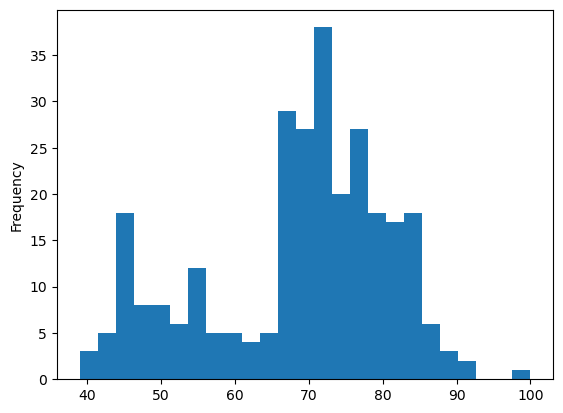

In [291]:
alb_aggs['song_popularity'].plot.hist(bins=25)

In [292]:
alb_aggs_2 = alb_aggs.groupby(['album_id', 'album_title', 'tv']).agg({
                                'alb_num': 'mean', 
                                'alb_track_cnt':'mean',
                                'w1_trad_album_sales':'mean', 
                                'tot_spot_plays_song':'sum', # adding up all the song plays to make album total
                                'streams_normal':'sum',   # adding up all the song plays to make album total                    
                                'song_popularity':'mean', # using median to help with outliers for all measures of central tendancy
                                'top_s_cnt':'mean', #using mean because same value across songs for each album
                                'top_alb_count':'mean', #using mean because same value across songs for each album
                                'top_alb_normal':'mean', #using mean because same value across songs for each album
                                'days_since_release': 'mean', #using mean because same value across songs for each album
                                'album_announce_day': 'mean', #using mean because same value across songs for each album
                                'album_announce_yr': 'mean',  #using mean because same value across songs for each album
                                'album_release_day': 'mean', #using mean because same value across songs for each album
                                'album_release_year': 'mean', #using mean because same value across songs for each album
                                'acousticness': 'median', # all values here and below use median, after compute aggs will remove og from df
                                 'danceability': 'median', 
                                 'energy': 'median',
                                 'instrumentalness': 'median', 
                                  'liveness': 'median',
                                 'loudness': 'median', 
                                 'speechiness':'median', 
                                 'tempo':'median', 
                                 'valence':'median',
                                 'duration_ms': 'median'
}).reset_index()

In [293]:
alb_aggs_2.head()

,album_id,album_title,tv,alb_num,alb_track_cnt,w1_trad_album_sales,tot_spot_plays_song,streams_normal,song_popularity,top_s_cnt,...,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms
0,1989,1989 (Deluxe Edition),original,5.000,19.000,1297000.000,7274954212,2204522,67.158,5.000,...,0.069,0.633,0.692,0.000,0.118,-6.104,0.055,119.997,0.495,220440.000
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14.000,22.000,1359000.000,1462293896,112484136,79.818,14.000,...,0.039,0.610,0.679,0.000,0.114,-6.483,0.044,118.023,0.374,224955.000
2,DEBUT,Debut,original,1.000,15.000,39000.000,1164903748,187127,63.133,1.000,...,0.087,0.576,0.672,0.000,0.128,-4.931,0.029,115.028,0.428,213053.000
3,EVER,evermore (deluxe version),original,9.000,17.000,154500.000,3801516966,3584268,72.765,9.000,...,0.830,0.546,0.517,0.000,0.114,-10.381,0.038,122.079,0.354,245026.000
4,FEAR,Fearless Platinum Edition,original,2.000,19.000,592300.000,2590571504,473068,45.947,2.000,...,0.130,0.592,0.636,0.000,0.113,-4.993,0.031,118.982,0.307,244240.000


In [294]:
alb_aggs_2

,album_id,album_title,tv,alb_num,alb_track_cnt,w1_trad_album_sales,tot_spot_plays_song,streams_normal,song_popularity,top_s_cnt,...,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms
0,1989,1989 (Deluxe Edition),original,5.000,19.000,1297000.000,7274954212,2204522,67.158,5.000,...,0.069,0.633,0.692,0.000,0.118,-6.104,0.055,119.997,0.495,220440.000
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14.000,22.000,1359000.000,1462293896,112484136,79.818,14.000,...,0.039,0.610,0.679,0.000,0.114,-6.483,0.044,118.023,0.374,224955.000
2,DEBUT,Debut,original,1.000,15.000,39000.000,1164903748,187127,63.133,1.000,...,0.087,0.576,0.672,0.000,0.128,-4.931,0.029,115.028,0.428,213053.000
3,EVER,evermore (deluxe version),original,9.000,17.000,154500.000,3801516966,3584268,72.765,9.000,...,0.830,0.546,0.517,0.000,0.114,-10.381,0.038,122.079,0.354,245026.000
4,FEAR,Fearless Platinum Edition,original,2.000,19.000,592300.000,2590571504,473068,45.947,2.000,...,0.130,0.592,0.636,0.000,0.113,-4.993,0.031,118.982,0.307,244240.000
5,FEARTV,Fearless (Taylor's Version),Taylor's Version,10.000,26.000,179000.000,3776863210,4000902,71.615,10.000,...,0.111,0.566,0.625,0.000,0.130,-6.089,0.034,129.031,0.422,241989.500
6,FOLK,folklore (deluxe version),original,8.000,17.000,615000.000,6156253069,5119556,73.059,8.000,...,0.750,0.593,0.376,0.000,0.105,-10.064,0.036,119.580,0.404,234000.000
7,LOVE,Lover,original,7.000,18.000,679000.000,8029477011,5217324,82.611,7.000,...,0.125,0.704,0.599,0.000,0.108,-7.806,0.057,107.013,0.470,199419.500
8,MIDN,Midnights (The Til Dawn Edition),original,12.000,23.000,1140000.000,7116052008,19032283,69.609,12.000,...,0.318,0.653,0.451,0.000,0.118,-10.312,0.065,109.846,0.198,204852.000
9,RED,Red (Deluxe Edition),original,4.000,22.000,1208000.000,3204011914,794044,47.864,4.000,...,0.058,0.625,0.599,0.000,0.102,-6.777,0.032,109.993,0.478,238666.500


In [295]:
alb_aggs_2.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_spot_plays_song', 'streams_normal',
       'song_popularity', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_since_release', 'album_announce_day', 'album_announce_yr',
       'album_release_day', 'album_release_year', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'duration_ms'],
      dtype='object')

In [296]:
# Rename columns with aliases

alb_aggs_2.rename(columns={
                                'tot_spot_plays_song':'tot_alb_plays', 
                                'streams_normal':'alb_streams_norm',                     
                                'song_popularity':'avg_song_pop', 
                                'days_since_release': 'days_sr', 
                                'album_announce_day': 'alb_ann_day', 
                                'album_announce_yr': 'alb_ann_yr',  
                                'album_release_day': 'alb_r_day', 
                                'album_release_year': 'alb_r_yr', 
                                'album_release_date': 'alb_r_date', 
                                'acousticness': 'acou_m', 
                                 'danceability': 'dance_m', 
                                 'energy': 'ener_m',
                                 'instrumentalness': 'instru_m', 
                                  'liveness': 'live_m',
                                 'loudness': 'loud_m', 
                                 'speechiness':'speech_m', 
                                 'tempo':'temp_m', 
                                 'valence':'val_m',
                                 'duration_ms': 'dur_m'
}, inplace=True)

In [297]:
alb_aggs_2.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm',
       'avg_song_pop', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m'],
      dtype='object')

In [298]:
alb_aggs_final = alb_aggs_2

# 10.  gsearch_st review, wrangle, and merges

In [299]:
gsearch_st.head()

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,us_search_avg,us_peak_search,global_search_avg,global_peak_search
0,"2006/09/28-2006/10/10, Alabama",2006/09/28-2006/10/10,2006-09-28,Alabama,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07
1,"2006/09/28-2006/10/10, Alaska",2006/09/28-2006/10/10,2006-09-28,Alaska,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07
2,"2006/09/28-2006/10/10, Arizona",2006/09/28-2006/10/10,2006-09-28,Arizona,8,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07
3,"2006/09/28-2006/10/10, Arkansas",2006/09/28-2006/10/10,2006-09-28,Arkansas,46,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07
4,"2006/09/28-2006/10/10, California",2006/09/28-2006/10/10,2006-09-28,California,3,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07


In [300]:
gsearch_st.shape

(3672, 14)

Plan to add the following to the gsearch

alb_sales
top_alb


To explore correlations in state preferences- will be able to use aggregates of states (including for dif periods) to compare to album_sales and number of top_alb

In [301]:
gsearch_unique_albs = gsearch_st['album_id'].unique()

In [302]:
gsearch_unique_albs

array(['DEBUT', 'SPEAK', '1989', 'REP', 'MIDN', 'SPEAKTV', '1989TV',
       'EVER', 'FEARTV', 'FOLK', 'LOVE', 'REDTV', 'RED', 'FEAR'],
      dtype=object)

## Use album_id to add first week alb_sales

This will not be connected to time, but rather can be used to find state trends. If needed can isolate first week from gsearch_st dataframe and directly compare that time period to album_sales as a time factor. Will also use days since album to normalize this figure

In [303]:
song_stream_alb_merge.columns

Index(['song_title', 'album_title', 'song_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', 'streams_normal', 'top_song',
       'top_song_flag', 'top_song_value', 'top_s_cnt', 'tv', 'alb_num',
       'album_announce_mo', 'album_announce_day', 'album_announce_yr',
       'album_announce_date', 'album_release_mo', 'album_release_day',
       'album_release_year', 'album_release_date', 'w1_trad_album_sales',
       'top_alb_count', 'top_alb_normal', 'alb_track_cnt'],
      dtype='object')

In [304]:
# Look up first week sales totals

sales_tot = song_stream_alb_merge.groupby('album_id')['w1_trad_album_sales'].mean()

In [305]:
sales_tot

album_id
1989      1297000.000
1989TV    1359000.000
DEBUT       39000.000
EVER       154500.000
FEAR       592300.000
FEARTV     179000.000
FOLK       615000.000
LOVE       679000.000
MIDN      1140000.000
RED       1208000.000
REDTV      369000.000
REP       1216000.000
SPEAK     1047000.000
SPEAKTV    507000.000
Name: w1_trad_album_sales, dtype: float64

In [306]:
gsearch_st.shape

(3672, 14)

In [307]:
# Create for loop for for week 1 album sales and add to gsearch_st

wk1_alb_sales = []

for value in gsearch_st['album_id']:
    if value == "1989":
        wk1_alb_sales.append(1297000)
    elif value == "DEBUT":
        wk1_alb_sales.append(39000)
    elif value == "REP":
        wk1_alb_sales.append(1216000)
    elif value == "FEAR":
        wk1_alb_sales.append(592300)
    elif value == "LOVE":
        wk1_alb_sales.append(679000)
    elif value == "SPEAK":
        wk1_alb_sales.append(1047000)
    elif value == "RED":
        wk1_alb_sales.append(1208000)
    elif value == "FOLK":
        wk1_alb_sales.append(615000)
    elif value == "EVER":
        wk1_alb_sales.append(154500)
    elif value == "FEARTV":
        wk1_alb_sales.append(179000)
    elif value == "REDTV":
        wk1_alb_sales.append(369000)
    elif value == "MIDN":
        wk1_alb_sales.append(1140000)
    elif value == "SPEAKTV":
        wk1_alb_sales.append(507000)
    elif value == "1989TV":
        wk1_alb_sales.append(1359000)
    else:
        wk1_alb_sales.append("unknown")

In [308]:
gsearch_st['wk1_alb_sales'] = wk1_alb_sales

In [309]:
gsearch_st.head()

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,us_search_avg,us_peak_search,global_search_avg,global_peak_search,wk1_alb_sales
0,"2006/09/28-2006/10/10, Alabama",2006/09/28-2006/10/10,2006-09-28,Alabama,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000
1,"2006/09/28-2006/10/10, Alaska",2006/09/28-2006/10/10,2006-09-28,Alaska,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000
2,"2006/09/28-2006/10/10, Arizona",2006/09/28-2006/10/10,2006-09-28,Arizona,8,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000
3,"2006/09/28-2006/10/10, Arkansas",2006/09/28-2006/10/10,2006-09-28,Arkansas,46,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000
4,"2006/09/28-2006/10/10, California",2006/09/28-2006/10/10,2006-09-28,California,3,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000


In [310]:
gsearch_st.shape

(3672, 15)

In [311]:
gsearch_st['wk1_alb_sales'].value_counts(dropna=False)

wk1_alb_sales
1140000    408
39000      255
1047000    255
1297000    255
1216000    255
507000     255
154500     255
179000     255
615000     255
679000     255
369000     255
1208000    255
592300     255
1359000    204
Name: count, dtype: int64

## Create new variable to add normalized spotify streams to see if relationship between certain states and streaming data

Using streaming averages calculated in prior step

1989         2204522
1989TV     112484136
DEBUT         187127
EVER         3584268
FEAR          473068
FEARTV       4000902
FOLK         5119556
LOVE         5217324
MIDN        19032283
RED           794044
REDTV        5588619
REP          2989259
SPEAK         630440
SPEAKTV     12195506

In [312]:
# Create for loop for for normalized spotify streams and add to gsearch_st

streams_norm = []

for value in gsearch_st['album_id']:
    if value == "1989":
        streams_norm.append(2204522)
    elif value == "DEBUT":
        streams_norm.append(187127)
    elif value == "REP":
        streams_norm.append(2989259)
    elif value == "FEAR":
        streams_norm.append(473068)
    elif value == "LOVE":
        streams_norm.append(5217324)
    elif value == "SPEAK":
        streams_norm.append(630440)
    elif value == "RED":
        streams_norm.append(794044)
    elif value == "FOLK":
        streams_norm.append(5119556)
    elif value == "EVER":
        streams_norm.append(3584268)
    elif value == "FEARTV":
        streams_norm.append(4000902)
    elif value == "REDTV":
        streams_norm.append(5588619)
    elif value == "MIDN":
        streams_norm.append(19032283)
    elif value == "SPEAKTV":
        streams_norm.append(12195506)
    elif value == "1989TV":
        streams_norm.append(112484136)
    else:
        streams_norm.append("unknown")

In [313]:
gsearch_st['streams_norm'] = streams_norm

In [314]:
gsearch_st.head()

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,us_search_avg,us_peak_search,global_search_avg,global_peak_search,wk1_alb_sales,streams_norm
0,"2006/09/28-2006/10/10, Alabama",2006/09/28-2006/10/10,2006-09-28,Alabama,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127
1,"2006/09/28-2006/10/10, Alaska",2006/09/28-2006/10/10,2006-09-28,Alaska,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127
2,"2006/09/28-2006/10/10, Arizona",2006/09/28-2006/10/10,2006-09-28,Arizona,8,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127
3,"2006/09/28-2006/10/10, Arkansas",2006/09/28-2006/10/10,2006-09-28,Arkansas,46,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127
4,"2006/09/28-2006/10/10, California",2006/09/28-2006/10/10,2006-09-28,California,3,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127


In [315]:
gsearch_st.shape

(3672, 16)

In [316]:
#Rename to match other dataframe

gsearch_st.rename(columns = {'streams_norm': 'streams_normal'}, inplace =True)

In [317]:
gsearch_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal'],
      dtype='object')

In [318]:
gsearch_st['streams_normal'] = gsearch_st['streams_normal'].astype(int)

In [319]:
gsearch_st['streams_normal'].dtype

dtype('int32')

In [320]:
# Check album sums of streams normalized

streams_figures_gsearch = gsearch_st.groupby('album_id')['streams_normal'].mean()

In [321]:
streams_figures_gsearch

album_id
1989        2204522.000
1989TV    112484136.000
DEBUT        187127.000
EVER        3584268.000
FEAR         473068.000
FEARTV      4000902.000
FOLK        5119556.000
LOVE        5217324.000
MIDN       19032283.000
RED          794044.000
REDTV       5588619.000
REP         2989259.000
SPEAK        630440.000
SPEAKTV    12195506.000
Name: streams_normal, dtype: float64

Should match: 1989 2204522 1989TV 112484136 DEBUT 187127 EVER 3584268 FEAR 473068 FEARTV 4000902 FOLK 5119556 LOVE 5217324 MIDN 19032283 RED 794044 REDTV 5588619 REP 2989259 SPEAK 630440 SPEAKTV 12195506

Variable successfully added

Dataframe exported below as gsearch_st_wrangled

## create numeric version of album and add to gsearch_st

In [322]:
# Create for loop for album_number, using album_ids due to use of deluxe/longest versions of albums

alb_num_g = []

for value in gsearch_st['album_id']:
    if value == "1989":
        alb_num_g.append(5)
    elif value == "DEBUT":
        alb_num_g.append(1)
    elif value == "REP":
        alb_num_g.append(6)
    elif value == "FEAR":
        alb_num_g.append(2)
    elif value == "LOVE":
        alb_num_g.append(7)
    elif value == "SPEAK":
        alb_num_g.append(3)
    elif value == "RED":
        alb_num_g.append(4)
    elif value == "FOLK":
        alb_num_g.append(8)
    elif value == "EVER":
        alb_num_g.append(9)
    elif value == "FEARTV":
        alb_num_g.append(10)
    elif value == "REDTV":
        alb_num_g.append(11)
    elif value == "MIDN":
        alb_num_g.append(12)
    elif value == "SPEAKTV":
        alb_num_g.append(13)
    elif value == "1989TV":
        alb_num_g.append(14)
    else:
        alb_num_g.append("unknown")

In [323]:
gsearch_st['alb_num'] = alb_num_g

In [324]:
gsearch_st.shape

(3672, 17)

In [325]:
gsearch_st.head()

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,us_search_avg,us_peak_search,global_search_avg,global_peak_search,wk1_alb_sales,streams_normal,alb_num
0,"2006/09/28-2006/10/10, Alabama",2006/09/28-2006/10/10,2006-09-28,Alabama,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1
1,"2006/09/28-2006/10/10, Alaska",2006/09/28-2006/10/10,2006-09-28,Alaska,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1
2,"2006/09/28-2006/10/10, Arizona",2006/09/28-2006/10/10,2006-09-28,Arizona,8,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1
3,"2006/09/28-2006/10/10, Arkansas",2006/09/28-2006/10/10,2006-09-28,Arkansas,46,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1
4,"2006/09/28-2006/10/10, California",2006/09/28-2006/10/10,2006-09-28,California,3,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1


## Create Taylor's Version variable for g_search

In [326]:
# Create for loop for Taylor's Version, usig album_ids
tvsearch = []

for value in gsearch_st['album_id']:
    if value == "1989":
        tvsearch.append("original")
    elif value == "DEBUT":
        tvsearch.append("original")
    elif value == "REP":
        tvsearch.append("original")
    elif value == "FEAR":
        tvsearch.append("original")
    elif value == "LOVE":
        tvsearch.append("original")
    elif value == "SPEAK":
        tvsearch.append("original")
    elif value == "RED":
        tvsearch.append("original")
    elif value == "FOLK":
        tvsearch.append("original")
    elif value == "EVER":
        tvsearch.append("original")
    elif value == "FEARTV":
        tvsearch.append("Taylor's Version")
    elif value == "REDTV":
        tvsearch.append("Taylor's Version")
    elif value == "MIDN":
        tvsearch.append("original")
    elif value == "SPEAKTV":
        tvsearch.append("Taylor's Version")
    elif value == "1989TV":
        tvsearch.append("Taylor's Version")
    else:
        tvsearch.append("unknown")

In [327]:
tvsearch

['original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',

In [328]:
gsearch_st['tv'] = tvsearch

In [329]:
gsearch_st.shape

(3672, 18)

In [330]:
gsearch_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv'],
      dtype='object')

In [331]:
gsearch_st.groupby('album_id')['tv'].value_counts()

album_id  tv              
1989      original            255
1989TV    Taylor's Version    204
DEBUT     original            255
EVER      original            255
FEAR      original            255
FEARTV    Taylor's Version    255
FOLK      original            255
LOVE      original            255
MIDN      original            408
RED       original            255
REDTV     Taylor's Version    255
REP       original            255
SPEAK     original            255
SPEAKTV   Taylor's Version    255
Name: count, dtype: int64

## Create a state code to use for correlations

In [332]:
unique_states = gsearch_st['state'].unique().tolist()

In [333]:
unique_states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [334]:
# Define function to assign each state a number

def assign_state_number(state):
    state_number_mapping = {
        'Alabama': 1,
        'Alaska':  2, 
        'Arizona':  3, 
        'Arkansas':  4, 
        'California':  5, 
        'Colorado':  6, 
        'Connecticut':  7, 
        'Delaware':  8, 
        'District of Columbia':  9, 
        'Florida':  10, 
        'Georgia':  11, 
        'Hawaii':  12, 
        'Idaho':  13, 
        'Illinois':  14, 
        'Indiana':  15, 
        'Iowa':  16, 
        'Kansas':  17, 
        'Kentucky':  18, 
        'Louisiana':  19, 
        'Maine':  20, 
        'Maryland':  21, 
        'Massachusetts':  22, 
        'Michigan':  23, 
        'Minnesota':  24, 
        'Mississippi':  25, 
        'Missouri':  26, 
        'Montana':  27, 
        'Nebraska':  28, 
        'Nevada':  29, 
        'New Hampshire':  30, 
        'New Jersey':  31, 
        'New Mexico':  32, 
        'New York':  33, 
        'North Carolina':  34, 
        'North Dakota':  35, 
        'Ohio':  36, 
        'Oklahoma':  37, 
        'Oregon':  38, 
        'Pennsylvania':  39, 
        'Rhode Island':  40, 
        'South Carolina':  41, 
        'South Dakota':  42, 
        'Tennessee':  43, 
        'Texas':  44, 
        'Utah':  45, 
        'Vermont':  46, 
        'Virginia':  47, 
        'Washington':  48, 
        'West Virginia':  49, 
        'Wisconsin':  50, 
        'Wyoming':  51
    }
    return state_number_mapping.get(state, -1)  # Default to -1 if state is not found


In [335]:
# Apply the function to create a new 'state_number' column

gsearch_st['state_num'] = gsearch_st['state'].apply(assign_state_number)

In [336]:
# Check dataframe 

gsearch_st['state_num'].value_counts(dropna=False)

state_num
1     72
39    72
29    72
30    72
31    72
32    72
33    72
34    72
35    72
36    72
37    72
38    72
40    72
27    72
41    72
42    72
43    72
44    72
45    72
46    72
47    72
48    72
49    72
50    72
28    72
26    72
2     72
13    72
3     72
4     72
5     72
6     72
7     72
8     72
9     72
10    72
11    72
12    72
14    72
25    72
15    72
16    72
17    72
18    72
19    72
20    72
21    72
22    72
23    72
24    72
51    72
Name: count, dtype: int64

# 11.  Export dataframes

In [337]:
#Export subset of song_info dataframe

df_song_info.to_csv(os.path.join(path, '02 Manipulated Data', 'song_info_clean_2.csv'))

In [338]:
#Export song_chart_aggs dataframe

song_chart_aggs.to_csv(os.path.join(path, '02 Manipulated Data', 'song_chart_aggs.csv'))

In [339]:
#Export top_songs_final dataframe for reference

top_songs_final.to_csv(os.path.join(path, '02 Manipulated Data', 'top_songs_final.csv'))

In [340]:
# Export song_stream_merge

song_stream_merge.to_csv(os.path.join(path, '02 Manipulated Data', 'song_stream_merge.csv'))

In [341]:
# Export song_stream_alb_merge

song_stream_alb_merge.to_csv(os.path.join(path, '02 Manipulated Data', 'song_stream_alb_merged.csv'))

In [342]:
# Export top streaming songs subset 

top_stream_songs.to_csv(os.path.join(path, '02 Manipulated Data', 'top_stream_songs.csv'))

In [343]:
# Export not top streaming songs subset 
not_top_stream_songs.to_csv(os.path.join(path, '02 Manipulated Data', 'not_top_stream_songs.csv'))

In [344]:
# Export song_stream_alb_aggs

alb_aggs_final.to_csv(os.path.join(path, '02 Manipulated Data', 'alb_aggs.csv'))

In [345]:
# Export gsearch_st after merge

gsearch_st.to_csv(os.path.join(path, '02 Manipulated Data', 'gsearch_st_wrangled.csv'))